# Understanding the impact restrictions on mobility and working from home has had on GB train station hubs as desirable retail environment locations

# 1. Understand the profile of each station 

## 1.1 Data Processing

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [209]:
poi= pd.read_csv('poiallfordatapoccessing_LSOA_fortableau_polygon.csv', encoding = 'unicode_escape')

In [1083]:
#poi= pd.read_csv('./tube_type/opening_classification_for_clustering_all.csv')  #, encoding = 'unicode_escape'

In [210]:
poi.sample(3)

LSOA11CD            LSOA11NM   MSOA11CD           MSOA11NM    LAD11CD  \
5619  E01000938         Camden 024B  E02000189         Camden 024  E09000007   
9206  E01004310  Tower Hamlets 015E  E02000878  Tower Hamlets 015  E09000030   
857   E01004761    Westminster 018D  E02000977    Westminster 018  E09000033   

            LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  ...  \
5619         Camden  E12000007  London      1752      1726  ...   
9206  Tower Hamlets  E12000007  London      1971      1893  ...   
857     Westminster  E12000007  London      1945      1922  ...   

                                   2021_1_Exi  \
5619                             310,292.0000   
9206                             498,300.0000   
857                              212,577.0000   

                                   2021_2_Ent  \
5619                             358,836.0000   
9206                             581,736.0000   
857                              227,573.0000   

                                   2021_2_Exi  \
5619                             340,865.0000   
9206                             575,319.0000   
857                              237,034.0000   

                                   index_righ  \
5619                                 920.0000   
9206                               4,202.0000   
857                                4,638.0000   

                                     objectid  lsoa11cd_2          lsoa11nm_2  \
5619                                 921.0000   E01000938         Camden 024B   
9206                               4,203.0000   E01004310  Tower Hamlets 015E   
857                                4,639.0000   E01004761    Westminster 018D   

               lsoa11nmw                               st_areasha  \
5619         Camden 024B                              80,973.5730   
9206  Tower Hamlets 015E                              91,519.9868   
857     Westminster 018D                             519,263.7874   

                                   st_lengths  
5619                               1,859.6073  
9206                               1,635.5638  
857                                5,583.0902  

[3 rows x 117 columns]

In [198]:
print(poi.columns.values)

['LSOA11CD' 'LSOA11NM' 'MSOA11CD' 'MSOA11NM' 'LAD11CD' 'LAD11NM' 'RGN11CD'
 'RGN11NM' 'USUALRES' 'HHOLDRES' 'COMESTRES' 'POPDEN' 'HHOLDS' 'AVHHOLDSZ'
 'Station' 'stationtyp' 'Name' 'Street' 'PostCode' 'BusinessTy'
 'SubCategor' 'Category' 'classifica' 'CreatedDat' 'createtime'
 'ClosedDate' 'closedtime' 'IsNew' 'lon' 'lat' 'RetailMix' 'Classifi_1'
 'circle' 'IMD_Decile' 'Median_Age' 'Population' 'pop_male' 'pop_female'
 'gender_rat' 'Net_annual' '2018_10_En' '2018_10_Ex' '2018_11_En'
 '2018_11_Ex' '2018_12_En' '2018_12_Ex' '2018_4_Ent' '2018_4_Exi'
 '2018_5_Ent' '2018_5_Exi' '2018_6_Ent' '2018_6_Exi' '2018_7_Ent'
 '2018_7_Exi' '2018_8_Ent' '2018_8_Exi' '2018_9_Ent' '2018_9_Exi'
 '2019_10_En' '2019_10_Ex' '2019_11_En' '2019_11_Ex' '2019_12_En'
 '2019_12_Ex' '2019_1_Ent' '2019_1_Exi' '2019_2_Ent' '2019_2_Exi'
 '2019_3_Ent' '2019_3_Exi' '2019_4_Ent' '2019_4_Exi' '2019_5_Ent'
 '2019_5_Exi' '2019_6_Ent' '2019_6_Exi' '2019_7_Ent' '2019_7_Exi'
 '2019_8_Ent' '2019_8_Exi' '2019_9_Ent' '2019_9_E

In [1085]:
volume= pd.read_csv('Entry_Exit_selected_longformat.csv') 
volume.sample(10)

Station  2018_10_Entry  2018_10_Exit  2018_11_Entry  \
0                Barking         818421        780819         792237   
2   Highbury & Islington         768689        803628         773949   
6             Paddington        2528772       2472064        2511788   
9               Victoria        5337381       5578957        5141496   
8               Waterloo        3891917       4550944        3762728   
10             Stratford        3097337       3060828        3016732   
7             St pancras         311738        325719         299606   
1       Clapham Junction        1058822       1035433        1048131   
3            Kings Cross        4253289       4175728        4167727   
5          Oxford Circus        3271980       3668543        3377488   

    2018_11_Exit  2018_12_Entry  2018_12_Exit  2018_4_Entry  2018_4_Exit  \
0         770520         697513        667840        732795       706460   
2         812706         666148        698548        722806       753638   
6        2452418        2024382       1966072       2167240      2079592   
9        5399412        4354698       4458884       4874215      4980244   
8        4413730        3200167       3731978       3466240      3937080   
10       2975862        2951926       2900787       2524579      2538201   
7         319298         251475        267304        225690       233932   
1        1030962         878060        853990        934917       918266   
3        4141776        3749739       3680424       3859479      3777856   
5        3733887        3436415       3870174       2880683      3198183   

    2018_5_Entry  ...  2020_7_Entry  2020_7_Exit  2020_8_Entry  2020_8_Exit  \
0         790191  ...        379880       362541        392224       370830   
2         751169  ...        204174       209545        250178       258393   
6        2246145  ...        418650       450307        552103       586806   
9        5134105  ...       1101032      1117638       1460898      1459241   
8        3806200  ...        628185       714257        851422       972800   
10       2745948  ...        941578       949402       1172345      1176193   
7         257793  ...         97741       103660        129093       133642   
1        1014044  ...        311242       308674        375483       380324   
3        4037610  ...        703373       687366       1013111       977662   
5        2927103  ...        622201       687434        848392       950585   

    2020_9_Entry  2020_9_Exit  2021_1_Entry  2021_1_Exit  2021_2_Entry  \
0         458182       442593        273707       266202        286600   
2         316787       324397        120829       126218        136595   
6         609307       668248        289478       281426        311080   
9        1748250      1782416        613224       649551        643258   
8         998830      1139692        351140       387619        397970   
10       1217759      1233108        454725       464773        483230   
7         136162       145757         47947        48918         53687   
1         481561       486674        180465       181249        197515   
3        1042518       996714        330730       310292        358836   
5        1004460      1119322        206254       212577        227573   

    2021_2_Exit  
0        280691  
2        142035  
6        305030  
9        682129  
8        440369  
10       497210  
7         55602  
1        196842  
3        340865  
5        237034  

[10 rows x 71 columns]

In [149]:
LSOA= pd.read_csv('LSOA_LSOA_2011_London_gen_MHW.csv') 
LSOA.sample(10)

Lad11Cd               Lad11Nm   Lsoa11Cd                   Lsoa11Nm  \
2130  E09000015                Harrow  E01002180                Harrow 013B   
530   E09000005                 Brent  E01000540                 Brent 004D   
672   E09000006               Bromley  E01000687               Bromley 037D   
675   E09000006               Bromley  E01000690               Bromley 002B   
3609  E09000026             Redbridge  E01003693             Redbridge 035D   
2944  E09000021  Kingston upon Thames  E01003010  Kingston upon Thames 001E   
148   E09000003                Barnet  E01000153                Barnet 026D   
4313  E09000031        Waltham Forest  E01004422        Waltham Forest 022A   
2523  E09000018              Hounslow  E01002580              Hounslow 008C   
358   E09000004                Bexley  E01000363                Bexley 020D   

       Msoa11Cd                  Msoa11Nm    Rgn11Cd Rgn11Nm  \
2130  E02000445                Harrow 013  E12000007  London   
530   E02000096                 Brent 004  E12000007  London   
672   E02000163               Bromley 037  E12000007  London   
675   E02000128               Bromley 002  E12000007  London   
3609  E02006924             Redbridge 035  E12000007  London   
2944  E02000598  Kingston upon Thames 001  E12000007  London   
148   E02000049                Barnet 026  E12000007  London   
4313  E02000916        Waltham Forest 022  E12000007  London   
2523  E02000533              Hounslow 008  E12000007  London   
358   E02000084                Bexley 020  E12000007  London   

                                    Avhholdsz  Comestres  Hholdres  Hholds  \
2130                                   2.7000          0      2085     783   
530                                    3.1000         19      1477     471   
672                                    2.4000          0      1603     656   
675                                    2.6000          0      1402     534   
3609                                   3.6000          0      1541     431   
2944                                   2.7000          0      1497     554   
148                                    2.5000          0      1541     620   
4313                                   2.8000          0      1662     589   
2523                                   2.1000          0      1386     675   
358                                    2.6000          0      1441     565   

                                       Popden  Usualres       几何  
2130                                  53.8000      2085  Polygon  
530                                   39.8000      1496  Polygon  
672                                   27.4000      1603  Polygon  
675                                   42.2000      1402  Polygon  
3609                                  34.7000      1541  Polygon  
2944                                  49.5000      1497  Polygon  
148                                   93.4000      1541  Polygon  
4313                                  12.4000      1662  Polygon  
2523                                 117.4000      1386  Polygon  
358                                   34.4000      1441  Polygon

In [151]:
poi_merged = pd.merge(poi, LSOA)
poi_merged.sample(10)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [1087]:
poi_merged.to_csv('poiallfordatapoccessing_LSOA.csv', index=False) 

In [975]:
classification= pd.read_csv('LDC_categories.csv') 
classification.sample(10)

Classification                                         Category
37        Service               Launderettes, Dry Cleaners & Other
25        Leisure                                    Entertainment
22        Leisure                                    Accommodation
33        Service                        Employment & Post Offices
3      Comparison                    Chemists, Toiletries & Health
15     Comparison              Sports, Toys, Cycle Shops & Hobbies
9      Comparison                                Florists & Garden
38        Service  Locksmiths, Clothing Alterations & Shoe Repairs
12     Comparison                     Gifts, China & Leather Goods
26        Leisure                                      Restaurants

In [141]:
poi_merged = pd.merge(poi, classification)
poi_merged.sample(10)

SourcePremiseId               Station  TargetPremiseId  \
4795          50013059         Oxford Circus         50034834   
8867          52392457      liverpool street         52534003   
4310          50886473            St pancras         52015561   
573           52833683  Highbury & Islington         52325754   
10395         52822270             Stratford         52612361   
1525          52887830           Kings Cross         52195037   
11208         50013059         Oxford Circus         50013263   
285           50013059         Oxford Circus         52065685   
12105         52822270             Stratford         52612745   
2613          52392457      liverpool street         52074626   

       TargetOccupierID                               Name  \
4795           10034834              Stratstone Land Rover   
8867           13782108                   Owl and Pussycat   
4310           13605002                                KFC   
573            12177238  Financial Solutions Advice Bureau   
10395          12934791                             Browns   
1525           12195037                  Camden Eye Clinic   
11208          10286143                             Behave   
285            12065685                   Soho Food & Wine   
12105          12651864                    Dorothy Perkins   
2613           13867159                 Nespresso Boutique   

             MultipleName StreetNo            Street  PostCode    Town  ...  \
4795           Stratstone       14   Berkeley Street   W1J 8DX  London  ...   
8867        Geronimo Inns       34  Redchurch Street    E2 7DP  London  ...   
4310                  KFC      323   Gray's Inn Road  WC1X 8PX  London  ...   
573                   NaN      179     Holloway Road    N7 8LX  London  ...   
10395                 NaN      NaN   Montfichet Road   E20 1EL  London  ...   
1525                  NaN       48      Phoenix Road   NW1 1ES  London  ...   
11208                 NaN        2     Ganton Street   W1F 7QL  London  ...   
285                   NaN       14     Poland Street   W1F 8QD  London  ...   
12105     Dorothy Perkins      NaN   Montfichet Road   E20 1EJ  London  ...   
2613   Nespresso Boutique    74-75  Old Broad Street  EC2M 1QT  London  ...   

                                                Category CareOf CreatedDate  \
4795                           Car & Motorbike Showrooms    NaN    2001/2/1   
8867                                  Bars, Pubs & Clubs    NaN  2020/10/20   
4310                                   Cafes & Fast Food    NaN   2019/6/25   
573       Banks, Financial Services & Building Societies    NaN  2009/11/17   
10395                        Jewellers, Clocks & Watches    NaN    2014/2/7   
1525                       Hairdressing, Health & Beauty    NaN   2009/12/8   
11208                         Fashion & General Clothing    NaN   2005/9/14   
285                 Groceries, Supermarkets & Food Shops    NaN   2009/3/20   
12105                         Fashion & General Clothing    NaN   2011/9/21   
2613   Furniture, Carpets, Textiles, Bathrooms & Kitc...    NaN   2021/6/18   

      ClosedDate  IsNew Longitude   Latitude  RetailMix  \
4795    2022/4/3   True -0.143260  51.508310       Mass   
8867   2021/9/10   True -0.075530  51.524290        NaN   
4310         NaN   True -0.121320  51.530390        NaN   
573    2010/5/24   True -0.109200  51.550130        NaN   
10395        NaN   True -0.006270  51.543440        NaN   
1525   2013/1/17   True -0.130748  51.531135        NaN   
11208  2009/6/18   True -0.138200  51.513410        NaN   
285          NaN   True -0.137100  51.514710        NaN   
12105   2021/2/8  False -0.007820  51.544080       Mass   
2613         NaN   True -0.082970  51.517260       Mass   

       PreviousSubCategoryID  Classification  
4795                     NaN      Comparison  
8867                     NaN         Leisure  
4310                     NaN         Leisure  
573                      NaN  

In [143]:
#poi_merged.to_csv('poiall.csv', index=True) 

In [156]:
groups = poi.groupby(['Station','Classification'])
print(groups)

In [157]:
print(groups.size())

Station           Classification
Barking           Comparison         87
                  Convenience        60
                  Leisure            96
                  Miscellaneous      16
                  Non-retail         35
                                   ... 
liverpool street  Convenience        89
                  Leisure           682
                  Miscellaneous      34
                  Non-retail        256
                  Service           280
Length: 66, dtype: int64


In [158]:
print(type(groups.size())) 

<class 'pandas.core.series.Series'>


In [159]:
df1 = groups.size()

In [160]:
df1.sample(3)

Station           Classification
Clapham Junction  Non-retail        48
Waterloo          Non-retail        55
Paddington        Convenience       58
dtype: int64

In [161]:
df1=df1.to_frame()
df1.sample(3)

0
Station              Classification     
Highbury & Islington Leisure         140
Victoria             Comparison      135
Waterloo             Miscellaneous    19

In [162]:
df1.to_csv('df1.csv', index=True) 

In [163]:
df2 = pd.read_csv('df1.csv')
df2.sample(10)

Station Classification    0
8   Clapham Junction        Leisure  160
9   Clapham Junction  Miscellaneous   10
23       Kings Cross        Service  148
60  liverpool street     Comparison  283
29     Oxford Circus        Service  287
35        Paddington        Service  110
47         Stratford        Service   87
64  liverpool street     Non-retail  256
25     Oxford Circus    Convenience   85
32        Paddington        Leisure  294

In [164]:
df2 = df2.set_index(['Station','Classification'])
df2['%'] = df2 / df2.groupby('Station').sum()
print(df2)

                                   0         %
Station          Classification               
Barking          Comparison       87  0.229551
                 Convenience      60  0.158311
                 Leisure          96  0.253298
                 Miscellaneous    16  0.042216
                 Non-retail       35  0.092348
...                              ...       ...
liverpool street Convenience      89  0.054803
                 Leisure         682  0.419951
                 Miscellaneous    34  0.020936
                 Non-retail      256  0.157635
                 Service         280  0.172414

[66 rows x 2 columns]


In [165]:
df2.to_csv('df_1.csv', index=True) 

## 1.2 Find London LSOAs

In [211]:
#lsoas = gpd.read_file('https://github.com/jreades/fsds/blob/master/data/src/LSOAs.gpkg?raw=true')
lsoas = gpd.read_file('circle_LSOA.shp')
#lsoas = gpd.read_file('circle.shp')

<AxesSubplot:>

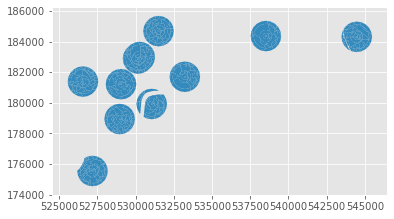

In [212]:
lsoas.plot()

In [213]:
lsoas.sample(5)

LSOA11CD                   LSOA11NM   MSOA11CD  \
11   E01000007  Barking and Dagenham 015A  E02000016   
256  E01004658           Westminster 012B  E02000971   
188  E01000945                Camden 023B  E02000188   
387  E01004746           Westminster 021D  E02000980   
340  E01003934             Southwark 002C  E02000808   

                     MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
11   Barking and Dagenham 015  E09000002  Barking and Dagenham  E12000007   
256           Westminster 012  E09000033           Westminster  E12000007   
188                Camden 023  E09000007                Camden  E12000007   
387           Westminster 021  E09000033           Westminster  E12000007   
340             Southwark 002  E09000028             Southwark  E12000007   

    RGN11NM  USUALRES  HHOLDRES  COMESTRES  \
11   London      1391      1391          0   
256  London      1557      1391        166   
188  London      1821      1493        328   
387  London      1440      1440          0   
340  London      1422      1422          0   

                                      POPDEN  HHOLDS  \
11                                   69.6000     612   
256                                 153.1000     744   
188                                  67.1000     611   
387                                 356.4000     757   
340                                  60.4000     811   

                                   AVHHOLDSZ circle  \
11                                    2.3000      1   
256                                   1.9000      4   
188                                   2.4000      4   
387                                   1.9000      5   
340                                   1.8000      4   

                                                  path  \
11   C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
256  C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
188  C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
387  MultiPolygon?crs=EPSG:27700&field=LSOA11CD:str...   
340  C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   

                                              geometry  
11   POLYGON ((544417.928 184305.314, 544415.481 18...  
256  POLYGON ((527359.316 181394.135, 527357.754 18...  
188  POLYGON ((529397.813 182651.056, 529358.658 18...  
387  POLYGON ((529918.969 178694.195, 529887.191 17...  
340  POLYGON ((531701.457 180398.167, 531815.089 18...

In [105]:
print(lsoas.Station.unique())

#['Oxford Circus' 'Kings Cross' 'St pancras' 'Victoria' 'Stratford'
 #'Paddington' 'Clapham Junction' 'Barking' 'liverpool street' 'Waterloo'
 #'Highbury & Islington']

AttributeError: 'GeoDataFrame' object has no attribute 'Station'

In [83]:
lsoas['Station'] = lsoas['Station'].replace(['Highbury and Islington',"King's Cross",
                                             'Kings Cross St. Pancras','Liverpool Street'],
                                            ['Highbury & Islington',"Kings Cross",'St pancras','liverpool street'])

In [206]:
#poi['circle'] = poi['circle'].replace(['1.0', '2.0','3.0','4.0','5.0'],
                                           # ['1', '2','3','4','5'])

In [217]:
lsoas["LSOA_circle"] = lsoas['LSOA11CD'].astype(str) +"-"+ lsoas["circle"].astype(str)
lsoas.sample(5)

LSOA11CD                   LSOA11NM   MSOA11CD  \
129  E01000044  Barking and Dagenham 016D  E02000017   
264  E01004686           Westminster 015E  E02000974   
93   E01002719             Islington 016B  E02000569   
161  E01004731           Westminster 020A  E02000979   
499  E01004688           Westminster 019B  E02000978   

                     MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
129  Barking and Dagenham 016  E09000002  Barking and Dagenham  E12000007   
264           Westminster 015  E09000033           Westminster  E12000007   
93              Islington 016  E09000019             Islington  E12000007   
161           Westminster 020  E09000033           Westminster  E12000007   
499           Westminster 019  E09000033           Westminster  E12000007   

    RGN11NM  USUALRES  HHOLDRES  COMESTRES  \
129  London      1798      1793          5   
264  London      1529      1529          0   
93   London      1490      1490          0   
161  London      1781      1658        123   
499  London      1950       878       1072   

                                      POPDEN  HHOLDS  \
129                                 105.4000     629   
264                                 243.1000     848   
93                                  102.1000     737   
161                                  26.4000     910   
499                                  26.1000     486   

                                   AVHHOLDSZ circle  \
129                                   2.9000      3   
264                                   1.8000      4   
93                                    2.0000      3   
161                                   1.8000      4   
499                                   1.8000      5   

                                                  path  \
129  C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
264  C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
93   C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
161  C:\Users\nekopi\Documents\OneDrive\CASA\21-22_...   
499  MultiPolygon?crs=EPSG:27700&field=LSOA11CD:str...   

                                              geometry  LSOA_circle  
129  POLYGON ((544789.088 184085.651, 544759.909 18...  E01000044-3  
264  POLYGON ((527320.161 181146.921, 527281.643 18...  E01004686-4  
93   POLYGON ((531900.361 184691.026, 531884.848 18...  E01002719-3  
161  MULTIPOLYGON (((528711.207 179704.129, 528804....  E01004731-4  
499  POLYGON ((526250.299 180443.078, 525971.530 18...  E01004688-5

In [215]:
gs = gpd.GeoDataFrame(poi, geometry=gpd.points_from_xy(poi.lon, poi.lat, crs='epsg:4326'))
gs = gs.to_crs('epsg:27700')
gs.sample(5)

LSOA11CD            LSOA11NM   MSOA11CD           MSOA11NM    LAD11CD  \
8721   E01004307  Tower Hamlets 015B  E02000878  Tower Hamlets 015  E09000030   
7620   E01003617         Newham 012B  E02000725         Newham 012  E09000025   
559    E01004716    Westminster 011C  E02000970    Westminster 011  E09000033   
14800  E01032582        Lambeth 036E  E02006801        Lambeth 036  E09000022   
11129  E01033708        Hackney 027G  E02000371        Hackney 027  E09000012   

             LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  ...  \
8721   Tower Hamlets  E12000007  London      2186      1857  ...   
7620          Newham  E12000007  London      2769      2769  ...   
559      Westminster  E12000007  London      1423      1419  ...   
14800        Lambeth  E12000007  London      1893      1893  ...   
11129        Hackney  E12000007  London      1599      1509  ...   

                                    2021_2_Ent  \
8721                              581,736.0000   
7620                              483,230.0000   
559                               227,573.0000   
14800                             397,970.0000   
11129                             581,736.0000   

                                    2021_2_Exi  \
8721                              575,319.0000   
7620                              497,210.0000   
559                               237,034.0000   
14800                             440,369.0000   
11129                             575,319.0000   

                                    index_righ  \
8721                                4,199.0000   
7620                                3,536.0000   
559                                 4,595.0000   
14800                               6,949.0000   
11129                               7,137.0000   

                                      objectid lsoa11cd_2          lsoa11nm_2  \
8721                                4,200.0000  E01004307  Tower Hamlets 015B   
7620                                3,537.0000  E01003617         Newham 012B   
559                                 4,596.0000  E01004716    Westminster 011C   
14800                              31,768.0000  E01032582        Lambeth 036E   
11129                              32,784.0000  E01033708        Hackney 027G   

                lsoa11nmw                               st_areasha  \
8721   Tower Hamlets 015B                             211,749.5033   
7620          Newham 012B                             227,319.2013   
559      Westminster 011C                             179,166.1039   
14800        Lambeth 036E                             315,063.6099   
11129        Hackney 027G                             355,769.5016   

                                    st_lengths                       geometry  
8721                                2,863.7796  POINT (533551.289 181526.355)  
7620                                2,841.5549  POINT (538876.034 184416.731)  
559                                 2,613.8521  POINT (528774.435 182032.870)  
14800                               3,594.9528  POINT (531073.180 179651.348)  
11129                               3,679.5133  POINT (533262.681 182550.339)  

[5 rows x 118 columns]

In [163]:
print(gs.columns.values)

['Station' 'stationtype' 'Name' 'Street' 'PostCode' 'BusinessTy'
 'SubCategor' 'Category' 'CreatedDat' 'createtimecode' 'ClosedDate'
 'closedtimecode' 'IsNew' 'Longitude' 'Latitude' 'RetailMix' 'Classifica'
 'circle' 'LSOA11CD' 'LSOA11NM' 'MSOA11CD' 'USUALRES' 'HHOLDRES'
 'COMESTRES' 'POPDEN' 'HHOLDS' 'AVHHOLDSZ' 'IMD_Decile_2019'
 'Median_Age_2020' 'Population_2020' 'pop_male' 'pop_female'
 'gender_ratio' 'Net_annual_income_after_housing_costs_2018'
 '2018_10_Entry' '2018_10_Exit' '2018_11_Entry' '2018_11_Exit'
 '2018_12_Entry' '2018_12_Exit' '2018_4_Entry' '2018_4_Exit'
 '2018_5_Entry' '2018_5_Exit' '2018_6_Entry' '2018_6_Exit' '2018_7_Entry'
 '2018_7_Exit' '2018_8_Entry' '2018_8_Exit' '2018_9_Entry' '2018_9_Exit'
 '2019_10_Entry' '2019_10_Exit' '2019_11_Entry' '2019_11_Exit'
 '2019_12_Entry' '2019_12_Exit' '2019_1_Entry' '2019_1_Exit'
 '2019_2_Entry' '2019_2_Exit' '2019_3_Entry' '2019_3_Exit' '2019_4_Entry'
 '2019_4_Exit' '2019_5_Entry' '2019_5_Exit' '2019_6_Entry' '2019_6_Exit'
 '2

In [219]:
gs["LSOA_circle"] = gs['LSOA11CD'].astype(str) +"-"+ gs["circle"].astype(str)
gs.sample(3)

LSOA11CD        LSOA11NM   MSOA11CD       MSOA11NM    LAD11CD  \
14456  E01003934  Southwark 002C  E02000808  Southwark 002  E09000028   
10714  E01033708    Hackney 027G  E02000371    Hackney 027  E09000012   
14785  E01032582    Lambeth 036E  E02006801    Lambeth 036  E09000022   

         LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  ...  \
14456  Southwark  E12000007  London      1422      1422  ...   
10714    Hackney  E12000007  London      1599      1509  ...   
14785    Lambeth  E12000007  London      1893      1893  ...   

                                    2021_2_Exi  \
14456                             440,369.0000   
10714                             575,319.0000   
14785                             440,369.0000   

                                    index_righ  \
14456                               3,846.0000   
10714                               7,137.0000   
14785                               6,949.0000   

                                      objectid  lsoa11cd_2      lsoa11nm_2  \
14456                               3,847.0000   E01003934  Southwark 002C   
10714                              32,784.0000   E01033708    Hackney 027G   
14785                              31,768.0000   E01032582    Lambeth 036E   

            lsoa11nmw                               st_areasha  \
14456  Southwark 002C                             232,909.9384   
10714    Hackney 027G                             355,769.5016   
14785    Lambeth 036E                             315,063.6099   

                                    st_lengths                       geometry  \
14456                               2,551.0833  POINT (531402.811 180494.437)   
10714                               3,679.5133  POINT (533056.188 182033.041)   
14785                               3,594.9528  POINT (530946.975 179751.583)   

         LSOA_circle  
14456  E01003934-4.0  
10714  E01033708-3.0  
14785  E01032582-3.0  

[3 rows x 119 columns]

In [220]:
gs_la = lsoas.merge(gs,on='LSOA_circle')
print(gs_la.columns.values)

['LSOA11CD_x' 'LSOA11NM_x' 'MSOA11CD_x' 'MSOA11NM_x' 'LAD11CD_x'
 'LAD11NM_x' 'RGN11CD_x' 'RGN11NM_x' 'USUALRES_x' 'HHOLDRES_x'
 'COMESTRES_x' 'POPDEN_x' 'HHOLDS_x' 'AVHHOLDSZ_x' 'circle_x' 'path'
 'geometry_x' 'LSOA_circle' 'LSOA11CD_y' 'LSOA11NM_y' 'MSOA11CD_y'
 'MSOA11NM_y' 'LAD11CD_y' 'LAD11NM_y' 'RGN11CD_y' 'RGN11NM_y' 'USUALRES_y'
 'HHOLDRES_y' 'COMESTRES_y' 'POPDEN_y' 'HHOLDS_y' 'AVHHOLDSZ_y' 'Station'
 'stationtyp' 'Name' 'Street' 'PostCode' 'BusinessTy' 'SubCategor'
 'Category' 'classifica' 'CreatedDat' 'createtime' 'ClosedDate'
 'closedtime' 'IsNew' 'lon' 'lat' 'RetailMix' 'Classifi_1' 'circle_y'
 'IMD_Decile' 'Median_Age' 'Population' 'pop_male' 'pop_female'
 'gender_rat' 'Net_annual' '2018_10_En' '2018_10_Ex' '2018_11_En'
 '2018_11_Ex' '2018_12_En' '2018_12_Ex' '2018_4_Ent' '2018_4_Exi'
 '2018_5_Ent' '2018_5_Exi' '2018_6_Ent' '2018_6_Exi' '2018_7_Ent'
 '2018_7_Exi' '2018_8_Ent' '2018_8_Exi' '2018_9_Ent' '2018_9_Exi'
 '2019_10_En' '2019_10_Ex' '2019_11_En' '2019_11_Ex' '2019

In [189]:
#gs_la["Station_circle"] = gs_la['Station_left'].astype(str) +"-"+ gs_la["circle"].astype(str)
gs_la.sample

<bound method NDFrame.sample of       LSOA11CD_x        LSOA11NM_x MSOA11CD_x         MSOA11NM    LAD11CD  \
0      E01033595  Westminster 013E  E02000972  Westminster 013  E09000033   
1      E01033595  Westminster 013E  E02000972  Westminster 013  E09000033   
2      E01033595  Westminster 013E  E02000972  Westminster 013  E09000033   
3      E01033595  Westminster 013E  E02000972  Westminster 013  E09000033   
4      E01033595  Westminster 013E  E02000972  Westminster 013  E09000033   
...          ...               ...        ...              ...        ...   
14736  E01004735  Westminster 018B  E02000977  Westminster 018  E09000033   
14737  E01004735  Westminster 018B  E02000977  Westminster 018  E09000033   
14738  E01004735  Westminster 018B  E02000977  Westminster 018  E09000033   
14739  E01004735  Westminster 018B  E02000977  Westminster 018  E09000033   
14740  E01004735  Westminster 018B  E02000977  Westminster 018  E09000033   

           LAD11NM    RGN11CD RGN11NM  USUA

In [190]:
print(gs_la.shape)
#gs_la.sample(3, random_state=42)[['Station','Name','lsoa11nm']]

gs_la.sample(3)

(14741, 124)


LSOA11CD_x        LSOA11NM_x MSOA11CD_x         MSOA11NM    LAD11CD  \
3779  E01004749  Westminster 022B  E02000981  Westminster 022  E09000033   
6304  E01004553   Wandsworth 015A  E02000937   Wandsworth 015  E09000032   
4725  E01003619       Newham 012D  E02000725       Newham 012  E09000025   

          LAD11NM    RGN11CD RGN11NM  USUALRES_x  HHOLDRES_x  ...  \
3779  Westminster  E12000007  London        2445        2337  ...   
6304   Wandsworth  E12000007  London        1640        1640  ...   
4725       Newham  E12000007  London        2264        2195  ...   

      2020_7_Exit  2020_8_Entry  2020_8_Exit  2020_9_Entry 2020_9_Exit  \
3779      1117638       1460898      1459241       1748250     1782416   
6304       308674        375483       380324        481561      486674   
4725       949402       1172345      1176193       1217759     1233108   

     2021_1_Entry 2021_1_Exit 2021_2_Entry 2021_2_Exit  \
3779       613224      649551       643258      682129   
6304       180465      181249       197515      196842   
4725       454725      464773       483230      497210   

                         geometry_y  
3779  POINT (529148.660 178668.500)  
6304  POINT (527389.169 175226.956)  
4725  POINT (538782.065 184122.594)  

[3 rows x 124 columns]

In [88]:
print(gs_la.Station_left.unique())
print(gs_la.Station_right.unique())

['Oxford Circus' 'Kings Cross' 'St pancras' 'Victoria' 'Stratford'
 'Paddington' 'Clapham Junction' 'Barking' 'liverpool street' 'Waterloo'
 'Highbury & Islington']
['Oxford Circus' 'Kings Cross' 'St pancras' 'Victoria' 'Stratford'
 'Paddington' 'Clapham Junction' 'Barking' 'liverpool street' 'Waterloo'
 'Highbury & Islington']


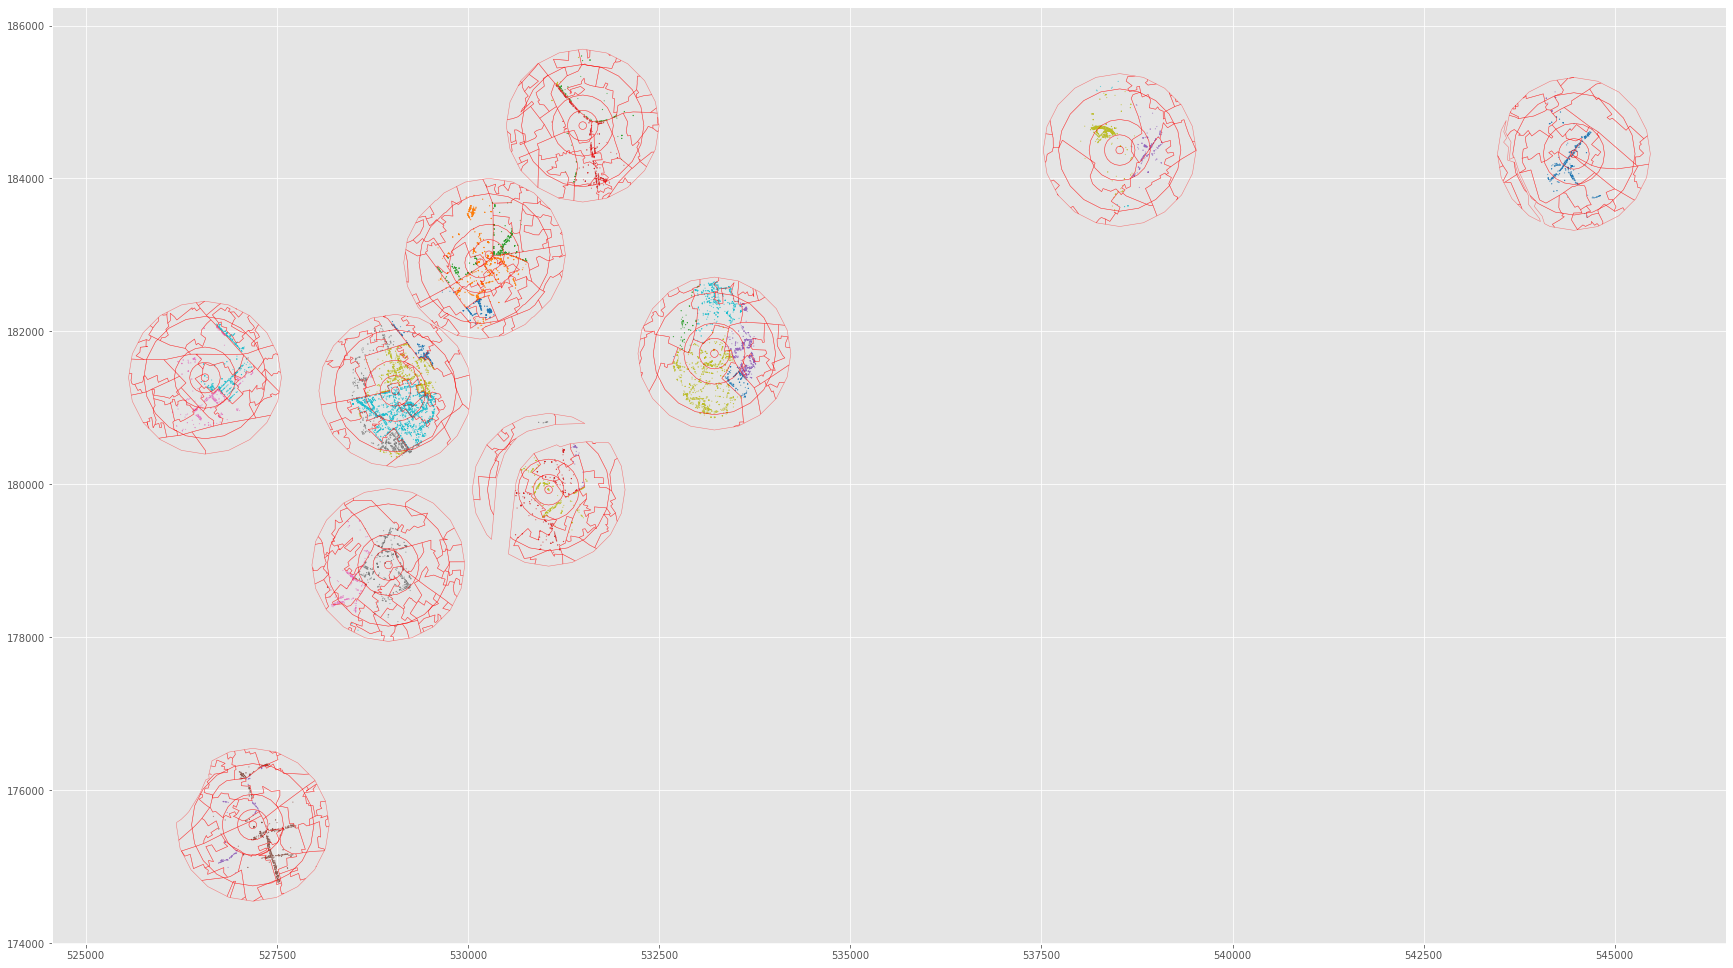

In [112]:
ax = gs_la.plot(column='LSOA11CD_circle', markersize=0.5, alpha=0.5, figsize=(30,25))
lsoas.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);

In [224]:
gs_la_test = gs_la.set_index('Name').groupby(['Station','LSOA_circle','classifica']).agg(
    {'classifica':['count']}
).reset_index()

In [225]:
gs_la_test.sample(3)

ValueError: a must be greater than 0 unless no samples are taken

In [226]:
cols = gs_la_test.columns.values
cols[0]  = 'Station'
cols[1]  = 'LSOA_circle'
cols[2]  = 'Classifica'
cols[3]  = 'count'
gs_la_test.columns = cols

In [227]:
gs_la_test.sample(3)

ValueError: a must be greater than 0 unless no samples are taken

In [195]:
test = gs_la_test.set_index('LSOA_circle').join(
                lsoas.set_index('LSOA_circle'), 
                rsuffix='_r')
test

Station     Classifica  count   LSOA11CD  \
LSOA_circle                                                      
E01000002-4  liverpool street    Convenience      1  E01000002   
E01000005-3  liverpool street     Comparison      6  E01000005   
E01000005-3  liverpool street    Convenience      1  E01000005   
E01000005-3  liverpool street        Leisure     27  E01000005   
E01000005-3  liverpool street     Non-retail      6  E01000005   
...                       ...            ...    ...        ...   
E01033708-5  liverpool street    Convenience     11  E01033708   
E01033708-5  liverpool street        Leisure     61  E01033708   
E01033708-5  liverpool street  Miscellaneous      2  E01033708   
E01033708-5  liverpool street     Non-retail     12  E01033708   
E01033708-5  liverpool street        Service     24  E01033708   

                        LSOA11NM   MSOA11CD            MSOA11NM    LAD11CD  \
LSOA_circle                                                                  
E01000002-4  City of London 001B  E02000001  City of London 001  E09000001   
E01000005-3  City of London 001E  E02000001  City of London 001  E09000001   
E01000005-3  City of London 001E  E02000001  City of London 001  E09000001   
E01000005-3  City of London 001E  E02000001  City of London 001  E09000001   
E01000005-3  City of London 001E  E02000001  City of London 001  E09000001   
...                          ...        ...                 ...        ...   
E01033708-5         Hackney 027G  E02000371         Hackney 027  E09000012   
E01033708-5         Hackney 027G  E02000371         Hackney 027  E09000012   
E01033708-5         Hackney 027G  E02000371         Hackney 027  E09000012   
E01033708-5         Hackney 027G  E02000371         Hackney 027  E09000012   
E01033708-5         Hackney 027G  E02000371         Hackney 027  E09000012   

                    LAD11NM    RGN11CD  ... USUALRES  HHOLDRES  COMESTRES  \
LSOA_circle                             ...                                 
E01000002-4  City of London  E12000007  ...     1436      1436          0   
E01000005-3  City of London  E12000007  ...      985       985          0   
E01000005-3  City of London  E12000007  ...      985       985          0   
E01000005-3  City of London  E12000007  ...      985       985          0   
E01000005-3  City of London  E12000007  ...      985       985          0   
...                     ...        ...  ...      ...       ...        ...   
E01033708-5         Hackney  E12000007  ...     1599      1509         90   
E01033708-5         Hackney  E12000007  ...     1599      1509         90   
E01033708-5         Hackney  E12000007  ...     1599      1509         90   
E01033708-5         Hackney  E12000007  ...     1599      1509         90   
E01033708-5         Hackney  E12000007  ...     1599      1509         90   

                                              POPDEN  HHOLDS  \
LSOA_circle                                                    
E01000002-4                                  62.9000     830   
E01000005-3                                  52.0000     467   
E01000005-3                                  52.0000     467   
E01000005-3                                  52.0000     467   
E01000005-3                                  52.0000     467   
...                                              ...     ...   
E01033708-5                                  44.8000     862   
E01033708-5                                  44.8000     862   
E01033708-5                                  44.8000     862   
E01033708-5                                  44.8000     862   
E01033708-5                                  44.8000     862   

                                           AVHHOLDSZ  circle  \
LSOA_circle                                                    
E01000002-4                                   1.7000       4   
E01000005-3                                   2.1000       3   
E01000005-3                                   2.1000     

In [186]:
test = test.set_geometry('geometry')
test.to_file('test.shp')  

/tmp/ipykernel_1497/3360001268.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  test.to_file('test.shp')


In [19]:
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
test = test.set_geometry('geometry')
test.plot(column='count', legend=True, figsize=(15,15));

In [1121]:
gs_la.to_file('poi.shp')  

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [242]:
gdf = gpd.GeoDataFrame(poi, geometry=gpd.points_from_xy(poi.Longitude, poi.Latitude, crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

In [243]:
gdf

Station                    Name             Street  \
0                   Barking  Loxford General Stores       Loxford Lane   
1                   Barking     Saints Liquor Store   Monteagle Avenue   
2                   Barking     Variety Food & Wine        Ripple Road   
3                   Barking     Barking Supermarket        Ripple Road   
4                   Barking                 Iceland        East Street   
...                     ...                     ...                ...   
14749             Stratford             The Pet Hut           Broadway   
14750              Victoria            Mungo & Maud   Elizabeth Street   
14751              Victoria           The City Barn  Grosvenor Gardens   
14752      Clapham Junction          Russell Motors        Falcon Road   
14753  Highbury & Islington               Autoparts      Holloway Road   

       PostCode BusinessType               SubCategory  \
0       IG1 2PJ  Independent        Convenience Stores   
1      IG11 8RA  Independent        Convenience Stores   
2      IG11 7NT  Independent                   Grocers   
3      IG11 7PG  Independent                   Grocers   
4      IG11 8EP     Multiple              Supermarkets   
...         ...          ...                       ...   
14749   E15 1NG     Multiple  Pet Shops & Pet Supplies   
14750  SW1W 9PJ  Independent  Pet Shops & Pet Supplies   
14751  SW1W 0BP  Independent  Pet Shops & Pet Supplies   
14752  SW11 2PE  Independent   Car Accessories & Parts   
14753    N7 8JG  Independent   Car Accessories & Parts   

                                   Category CreatedDate createtime ClosedDate  \
0      Groceries, Supermarkets & Food Shops   2007/4/28     before        NaN   
1      Groceries, Supermarkets & Food Shops   2007/4/28     before        NaN   
2      Groceries, Supermarkets & Food Shops    2008/1/9     before        NaN   
3      Groceries, Supermarkets & Food Shops    2008/1/9     before        NaN   
4      Groceries, Supermarkets & Food Shops    2008/1/9     before        NaN   
...                                     ...         ...        ...        ...   
14749              Pet Shops & Pet Supplies   2018/12/7     before  2020/8/13   
14750              Pet Shops & Pet Supplies   2006/6/22     before        NaN   
14751              Pet Shops & Pet Supplies    2011/6/8     before   2013/1/4   
14752                    Auto & Accessories    2001/4/3     before        NaN   
14753                    Auto & Accessories   2007/11/9     before        NaN   

      closedtime  IsNew  Longitude  Latitude RetailMix Classification  \
0           open  False    0.07848  51.54666       non    Convenience   
1           open  False    0.08187  51.54285       non    Convenience   
2           open   True    0.08182  51.53613       non    Convenience   
3           open   True    0.08099  51.53675       non    Convenience   
4           open   True    0.07813  51.53673     Value    Convenience   
...          ...    ...        ...       ...       ...            ...   
14749     during   True    0.00295  51.54241      Mass     Comparison   
14750       open   True   -0.15162  51.49402       non     Comparison   
14751     before   True   -0.14534  51.49697       non     Comparison   
14752       open  False   -0.16914  51.46613       non        Service   
14753       open   True   -0.10814  51.54960       non        Service   

                            geometry  
0      POINT (544219.369 185132.199)  
1      POINT (544466.469 184715.208)  
2      POINT (544484.270 183967.840)  
3      POINT (544424.748 184035.147)  
4      POINT (544226.474 184027.284)  
...                              ...  
14749  POINT (538995.518 184513.481)  
14750  POINT (528413.323 178850.174)  
14751  POINT (528840.943 179189.250)  
14752  POINT (527274.712 175718.145)  
14753  POINT (531271.714 185107.965)  

[14754 rows x 17 columns]

In [244]:
gdf.to_file('poiallfordatapoccessing.shp')  

/tmp/ipykernel_63/3738819006.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('poiallfordatapoccessing.shp')


## 1.2 Clustering Analysis

In [831]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score
import pandas as pd

In [804]:
cluster= pd.read_csv('poiall.csv', encoding = 'unicode_escape')
cluster.head(5)

SourcePremiseId  Station  TargetPremiseId  TargetOccupierID  \
0         52407879  Barking         50556040          10556040   
1         52407879  Barking         50583947          10583947   
2         52407879  Barking         50699156          10699156   
3         52407879  Barking         50699162          10699162   
4         52407879  Barking         50699216          10699216   

                     Name MultipleName StreetNo            Street  PostCode  \
0  Loxford General Stores          NaN       42      Loxford Lane   IG1 2PJ   
1     Saints Liquor Store          NaN   4-2???  Monteagle Avenue  IG11 8RA   
2     Variety Food & Wine          NaN       53       Ripple Road  IG11 7NT   
3     Barking Supermarket          NaN       48       Ripple Road  IG11 7PG   
4                 Iceland      Iceland    34-42       East Street  IG11 8EP   

      Town  ...                              Category CareOf CreatedDate  \
0   Ilford  ...  Groceries, Supermarkets & Food Shops    NaN   2007/4/28   
1  Barking  ...  Groceries, Supermarkets & Food Shops    NaN   2007/4/28   
2  Barking  ...  Groceries, Supermarkets & Food Shops    NaN    2008/1/9   
3  Barking  ...  Groceries, Supermarkets & Food Shops    NaN    2008/1/9   
4  Barking  ...  Groceries, Supermarkets & Food Shops    NaN    2008/1/9   

  ClosedDate  IsNew                                Longitude  \
0        NaN  False                                   0.0785   
1        NaN  False                                   0.0819   
2        NaN   True                                   0.0818   
3        NaN   True                                   0.0810   
4        NaN   True                                   0.0781   

                                  Latitude  RetailMix  PreviousSubCategoryID  \
0                                  51.5467        NaN                    NaN   
1                                  51.5429        NaN                    NaN   
2                                  51.5361        NaN                    NaN   
3                                  51.5367        NaN                    NaN   
4                                  51.5367      Value                    NaN   

   Classification  
0     Convenience  
1     Convenience  
2     Convenience  
3     Convenience  
4     Convenience  

[5 rows x 23 columns]

In [805]:
cluster=cluster[cluster['ClosedDate'].isna()]
cluster.head(5)

SourcePremiseId  Station  TargetPremiseId  TargetOccupierID  \
0         52407879  Barking         50556040          10556040   
1         52407879  Barking         50583947          10583947   
2         52407879  Barking         50699156          10699156   
3         52407879  Barking         50699162          10699162   
4         52407879  Barking         50699216          10699216   

                     Name MultipleName StreetNo            Street  PostCode  \
0  Loxford General Stores          NaN       42      Loxford Lane   IG1 2PJ   
1     Saints Liquor Store          NaN   4-2???  Monteagle Avenue  IG11 8RA   
2     Variety Food & Wine          NaN       53       Ripple Road  IG11 7NT   
3     Barking Supermarket          NaN       48       Ripple Road  IG11 7PG   
4                 Iceland      Iceland    34-42       East Street  IG11 8EP   

      Town  ...                              Category CareOf CreatedDate  \
0   Ilford  ...  Groceries, Supermarkets & Food Shops    NaN   2007/4/28   
1  Barking  ...  Groceries, Supermarkets & Food Shops    NaN   2007/4/28   
2  Barking  ...  Groceries, Supermarkets & Food Shops    NaN    2008/1/9   
3  Barking  ...  Groceries, Supermarkets & Food Shops    NaN    2008/1/9   
4  Barking  ...  Groceries, Supermarkets & Food Shops    NaN    2008/1/9   

  ClosedDate  IsNew                                Longitude  \
0        NaN  False                                   0.0785   
1        NaN  False                                   0.0819   
2        NaN   True                                   0.0818   
3        NaN   True                                   0.0810   
4        NaN   True                                   0.0781   

                                  Latitude  RetailMix  PreviousSubCategoryID  \
0                                  51.5467        NaN                    NaN   
1                                  51.5429        NaN                    NaN   
2                                  51.5361        NaN                    NaN   
3                                  51.5367        NaN                    NaN   
4                                  51.5367      Value                    NaN   

   Classification  
0     Convenience  
1     Convenience  
2     Convenience  
3     Convenience  
4     Convenience  

[5 rows x 23 columns]

In [748]:
total = cluster.groupby('Station').agg(
    total = ('SourcePremiseId','count')) 
total 

total
Station                    
Barking                 379
Clapham Junction        544
Highbury & Islington    417
Kings Cross             773
Oxford Circus          2373
Paddington              599
St pancras              807
Stratford               609
Victoria                659
Waterloo                524
liverpool street       1624

In [806]:
cate = cluster.groupby(['Station','Category']).size().reset_index(name='total_number_cate')
cate.head(10)

Station                                        Category  total_number_cate
0  Barking                                   Accommodation                  5
1  Barking                                   Auto Services                  1
2  Barking                                          Bakers                  2
3  Barking  Banks, Financial Services & Building Societies                  7
4  Barking                              Bars, Pubs & Clubs                  4
5  Barking      Books, Arts & Crafts, Stationery, Printers                  3
6  Barking                          Butchers & Fishmongers                  8
7  Barking                               Cafes & Fast Food                 58
8  Barking                       Car & Motorbike Showrooms                  1
9  Barking                      Charity & Secondhand Shops                  5

In [807]:
classi = cluster.groupby(['Station','Classification']).size().reset_index(name='total_number_classi')
classi.head(10)

Station Classification  total_number_classi
0           Barking     Comparison                   87
1           Barking    Convenience                   60
2           Barking        Leisure                   96
3           Barking  Miscellaneous                   16
4           Barking     Non-retail                   35
5           Barking        Service                   85
6  Clapham Junction     Comparison                  117
7  Clapham Junction    Convenience                   65
8  Clapham Junction        Leisure                  160
9  Clapham Junction  Miscellaneous                   10

In [809]:
cluster1.to_csv('cluster1.csv', index=False)

In [1016]:
# 读取数据
cluster2= pd.read_csv('cluster2.csv', encoding = 'unicode_escape', index_col=0)
cluster2.head(10)

Accommodation  Auto & Accessories  Auto Services  \
station                                                                  
Barking                           5                   0              1   
Clapham Junction                  2                   1              3   
Highbury & Islington              0                   1              1   
Kings Cross                      63                   0              9   
liverpool street                 30                   0              1   
Oxford Circus                    29                   0              0   
Paddington                      124                   0              5   
St pancras                       68                   0              9   
Stratford                        11                   0              4   
Victoria                         52                   0              7   

                      Bakers  Banks, Financial Services & Building Societies  \
station                                                                        
Barking                    2                                               7   
Clapham Junction           8                                               7   
Highbury & Islington       9                                               1   
Kings Cross                8                                              11   
liverpool street          11                                              34   
Oxford Circus             11                                              17   
Paddington                 6                                              20   
St pancras                 9                                              12   
Stratford                  5                                              14   
Victoria                  11                                              10   

                      Bars, Pubs & Clubs  \
station                                    
Barking                                4   
Clapham Junction                      32   
Highbury & Islington                  28   
Kings Cross                           38   
liverpool street                     139   
Oxford Circus                        131   
Paddington                            25   
St pancras                            43   
Stratford                             17   
Victoria                              34   

                      Books, Arts & Crafts, Stationery, Printers  \
station                                                            
Barking                                                        3   
Clapham Junction                                               8   
Highbury & Islington                                           6   
Kings Cross                                                   32   
liverpool street                                              21   
Oxford Circus                                                144   
Paddington                                                     6   
St pancras                                                    33   
Stratford                                                     11   
Victoria                                                      26   

                      Butchers & Fishmongers  Cafes & Fast Food  \
station                                                           
Barking                                    8                 58   
Clapham Junction                           4                 61   
Highbury & Islington                       0                 47   
Kings Cross                                1                104   
liverpool street                           2                259   
Oxford Circus                              1                211   
Paddington                                 2                 75   
St pancras                                 1                112   
Stratford                                  2                 62   
Victoria                                   0                 88   

                     

In [1023]:
cluster2test = cluster2.reset_index()
cluster2test.head(11)

station  Accommodation  Auto & Accessories  Auto Services  \
0                Barking              5                   0              1   
1       Clapham Junction              2                   1              3   
2   Highbury & Islington              0                   1              1   
3            Kings Cross             63                   0              9   
4       liverpool street             30                   0              1   
5          Oxford Circus             29                   0              0   
6             Paddington            124                   0              5   
7             St pancras             68                   0              9   
8              Stratford             11                   0              4   
9               Victoria             52                   0              7   
10              Waterloo             18                   0              5   

    Bakers  Banks, Financial Services & Building Societies  \
0        2                                               7   
1        8                                               7   
2        9                                               1   
3        8                                              11   
4       11                                              34   
5       11                                              17   
6        6                                              20   
7        9                                              12   
8        5                                              14   
9       11                                              10   
10       7                                               0   

    Bars, Pubs & Clubs  Books, Arts & Crafts, Stationery, Printers  \
0                    4                                           3   
1                   32                                           8   
2                   28                                           6   
3                   38                                          32   
4                  139                                          21   
5                  131                                         144   
6                   25                                           6   
7                   43                                          33   
8                   17                                          11   
9                   34                                          26   
10                  34                                          17   

    Butchers & Fishmongers  Cafes & Fast Food  ...  Miscellaneous  \
0                        8                 58  ...              6   
1                        4                 61  ...              5   
2                        0                 47  ...              5   
3                        1                104  ...             16   
4                        2                259  ...             10   
5                        1                211  ...              8   
6                        2                 75  ...              5   
7                        1                112  ...             18   
8                        2                 62  ...              4   
9                        0                 88  ...             10   
10                       0                 85  ...              7   

    Off Licenses  Pawnbroking & Cheque Cashing  Pet Shops & Pet Supplies  \
0              0                             2                         0   
1              5                             1                         2   
2              6                             0                         1   
3              4                             2                         0   
4             10                             0                         0   
5              4                             1                         0   
6              1                             4                         0   
7              4                             2           

In [1019]:
cluster2test = cluster2.T
cluster2test.head(11)

station                                         Barking  Clapham Junction  \
Accommodation                                         5                 2   
Auto & Accessories                                    0                 1   
Auto Services                                         1                 3   
Bakers                                                2                 8   
Banks, Financial Services & Building Societies        7                 7   
Bars, Pubs & Clubs                                    4                32   
Books, Arts & Crafts, Stationery, Printers            3                 8   
Butchers & Fishmongers                                8                 4   
Cafes & Fast Food                                    58                61   
Car & Motorbike Showrooms                             1                 1   
Charity & Secondhand Shops                            5                 9   

station                                         Highbury & Islington  \
Accommodation                                                      0   
Auto & Accessories                                                 1   
Auto Services                                                      1   
Bakers                                                             9   
Banks, Financial Services & Building Societies                     1   
Bars, Pubs & Clubs                                                28   
Books, Arts & Crafts, Stationery, Printers                         6   
Butchers & Fishmongers                                             0   
Cafes & Fast Food                                                 47   
Car & Motorbike Showrooms                                          1   
Charity & Secondhand Shops                                         4   

station                                         Kings Cross  liverpool street  \
Accommodation                                            63                30   
Auto & Accessories                                        0                 0   
Auto Services                                             9                 1   
Bakers                                                    8                11   
Banks, Financial Services & Building Societies           11                34   
Bars, Pubs & Clubs                                       38               139   
Books, Arts & Crafts, Stationery, Printers               32                21   
Butchers & Fishmongers                                    1                 2   
Cafes & Fast Food                                       104               259   
Car & Motorbike Showrooms                                 1                 2   
Charity & Secondhand Shops                                1                 0   

station                                         Oxford Circus  Paddington  \
Accommodation                                              29         124   
Auto & Accessories                                          0           0   
Auto Services                                               0           5   
Bakers                                                     11           6   
Banks, Financial Services & Building Societies             17          20   
Bars, Pubs & Clubs                                        131          25   
Books, Arts & Crafts, Stationery, Printers                144           6   
Butchers & Fishmongers                                      1           2   
Cafes & Fast Food                                         211          75   
Car & Motorbike Showrooms                                  12           2   
Charity & Secondhand Shops                                  4           1   

station                                         St pancras  Stratford  \
Accommodation                                           68         11   
Auto & Accessories                                       0          0   
Auto Services                                            9          4   
Bakers              

KeyError: 'station'

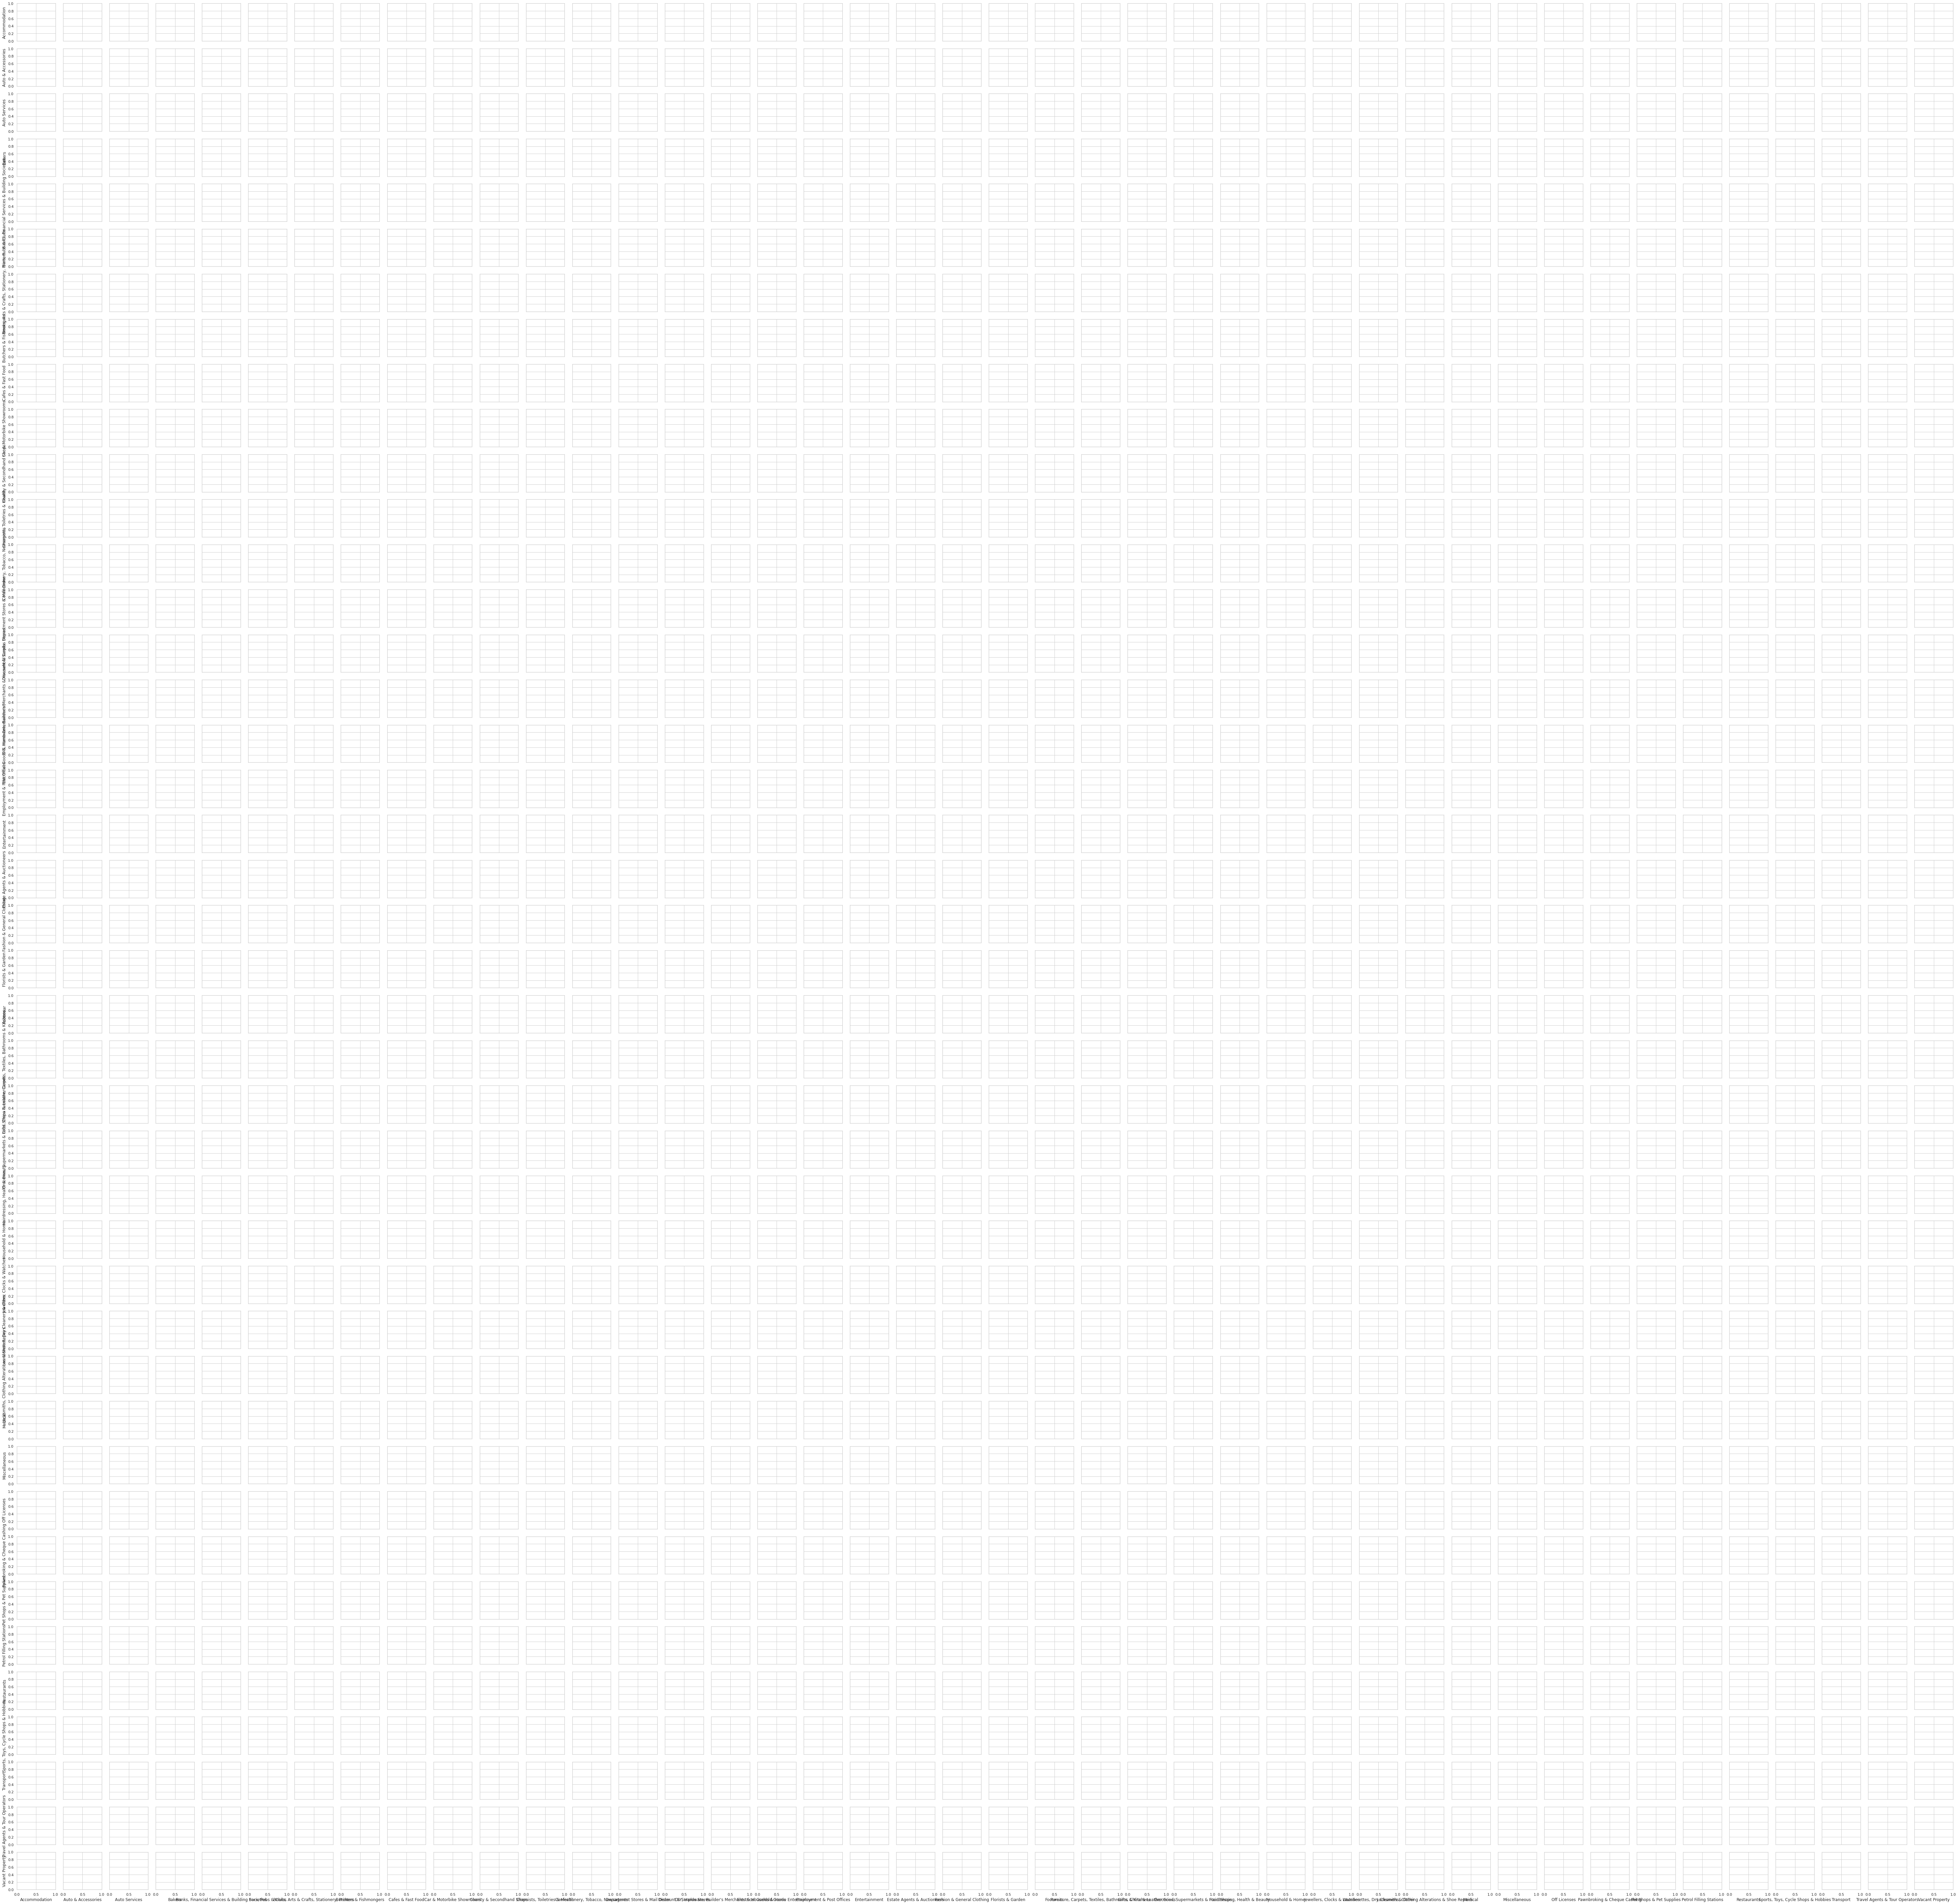

In [1022]:
sns.pairplot(cluster2, hue="station", height=2.5)

In [1099]:
closed_volume1= pd.read_csv('closed数量.csv')
closed_volume1.head(3)

Station                                 2018/4 /  \
0               Barking                                   0.0000   
1      Clapham Junction                                   0.0000   
2  Highbury & Islington                                   0.0000   

                                  2018/5 /  \
0                                   2.0000   
1                                   1.0000   
2                                  10.0000   

                                  2018/6 /  \
0                                   0.0000   
1                                   1.0000   
2                                   6.0000   

                                  2018/7 /  \
0                                   0.0000   
1                                  11.0000   
2                                   0.0000   

                                  2018/9 /  \
0                                  25.0000   
1                                   0.0000   
2                                   1.0000   

                                 2018/10 /  \
0                                   0.0000   
1                                   1.0000   
2                                  13.0000   

                                 2018/11 /  \
0                                   0.0000   
1                                   1.0000   
2                                   0.0000   

                                 2018/12 /  \
0                                   0.0000   
1                                   0.0000   
2                                  12.0000   

                                  2019/1 /  ...  \
0                                   0.0000  ...   
1                                  23.0000  ...   
2                                   0.0000  ...   

                                  2020/5 /  \
0                                   2.0000   
1                                   0.0000   
2                                   0.0000   

                                  2020/6 /  \
0                                   0.0000   
1                                   1.0000   
2                                   0.0000   

                                  2020/7 /  \
0                                   0.0000   
1                                  25.0000   
2                                   5.0000   

                                  2020/8 /  \
0                                   1.0000   
1                                   1.0000   
2                                  15.0000   

                                  2020/9 /  \
0                                  36.0000   
1                                   1.0000   
2                                   1.0000   

                                 2020/10 /  \
0                                   2.0000   
1                                   0.0000   
2                                   1.0000   

                                 2020/11 /  \
0                                   0.0000   
1                                   1.0000   
2                                   1.0000   

                                 2020/12 /  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   

                                  2021/1 /  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   

                                  2021/2 /  
0                                   3.0000  
1                                  33.0000  
2                                   4.0000  

[3 rows x 35 columns]

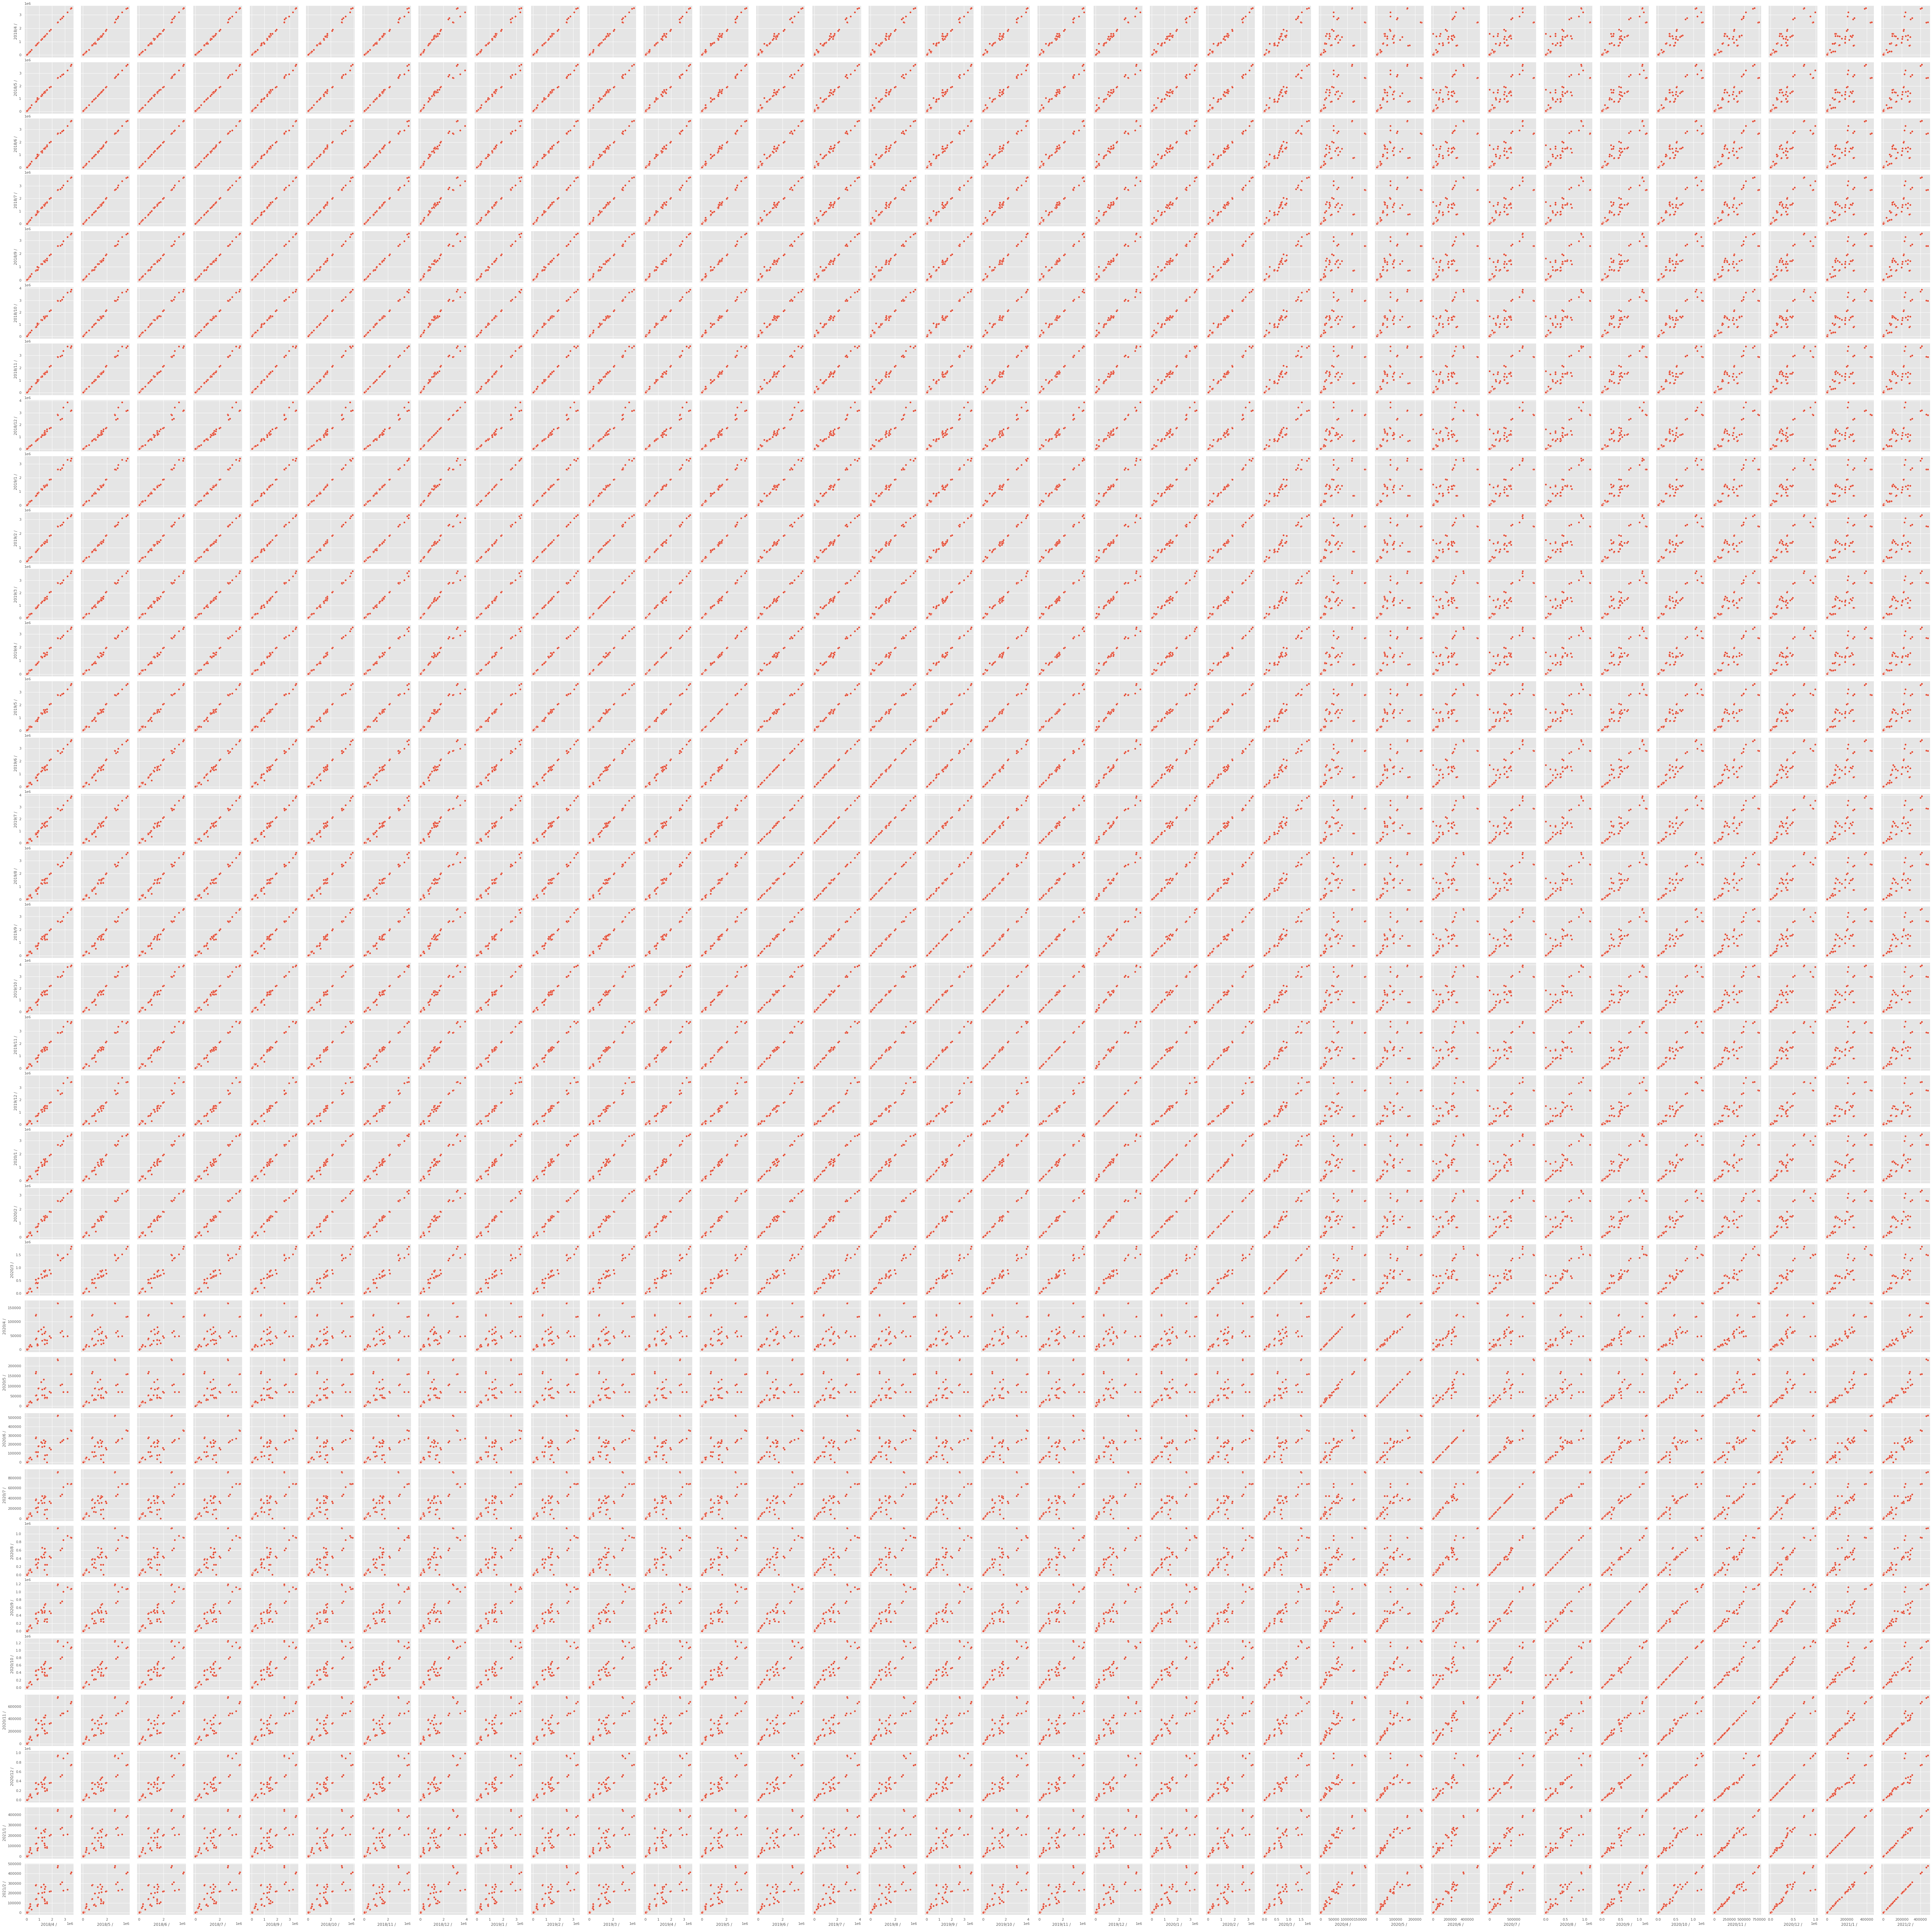

In [1100]:
g = sns.PairGrid(closed_volume1)
g.map(sns.scatterplot)

In [923]:
min_max_scaler = preprocessing.MinMaxScaler()
cluster2_minmax = min_max_scaler.fit_transform(cluster2) #归一化处理保证变化幅度一致
cluster2_minmax

array([[0.04032258, 0.        , 0.11111111, 0.        , 0.20588235,
        0.        , 0.        , 1.        , 0.05188679, 0.08333333,
        0.55555556, 0.16363636, 0.17241379, 0.        , 1.        ,
        0.14285714, 0.34210526, 0.125     , 0.28571429, 0.        ,
        0.01262626, 0.        , 0.06122449, 0.2       , 0.        ,
        0.86363636, 0.11801242, 0.75      , 0.        , 0.        ,
        0.        , 0.        , 0.14285714, 0.        , 0.4       ,
        0.        , 1.        , 0.        , 0.05882353, 0.46153846,
        0.5       , 0.01694915],
       [0.01612903, 1.        , 0.33333333, 0.66666667, 0.20588235,
        0.20740741, 0.03546099, 0.5       , 0.06603774, 0.08333333,
        1.        , 0.18181818, 0.10344828, 0.28571429, 0.16666667,
        0.21428571, 0.18421053, 0.375     , 0.        , 0.43478261,
        0.01262626, 0.5       , 0.06122449, 0.57142857, 0.        ,
        0.95454545, 0.36645963, 1.        , 0.01869159, 0.61538462,
        0.     

#### 确定聚类数量——elbow&silhouette score

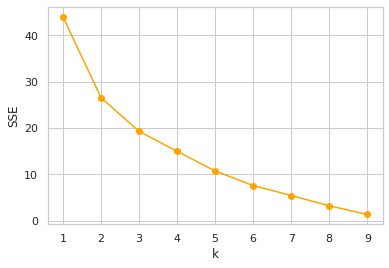

In [924]:
SSE = []
for k in range(1,10):
    clf=KMeans(n_clusters=k, random_state=42)
    clf.fit(cluster2_minmax)
    SSE.append(clf.inertia_)
    
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1,10),SSE,'o-', color='orange')

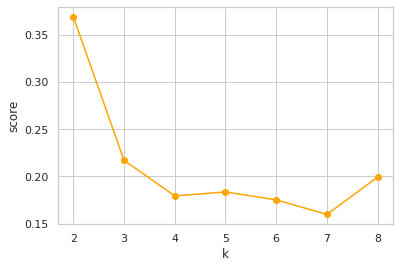

In [925]:
Scores=[]
for k in range(2,9):
    clf=KMeans(n_clusters=k, random_state=42)
    clf.fit(cluster2_minmax)
    Scores.append(silhouette_score(cluster2_minmax,clf.labels_,metric='euclidean'))
    
plt.xlabel('k')
plt.ylabel('score')
plt.plot(range(2,9),Scores,'o-', color='orange')

#### 使用k-means分层

In [926]:
clf = KMeans(n_clusters=5, random_state=42)
clf.fit(cluster2_minmax)
Labels=clf.labels_
cluster2['labels']=Labels

In [927]:
cluster2 = cluster2.sort_values(by='labels',ascending=True)
cluster2 = cluster2.reset_index()
cluster2.head(11)

station  Accommodation  Auto & Accessories  Auto Services  \
0       Clapham Junction              2                   1              3   
1   Highbury & Islington              0                   1              1   
2          Oxford Circus             29                   0              0   
3            Kings Cross             63                   0              9   
4             St pancras             68                   0              9   
5               Victoria             52                   0              7   
6                Barking              5                   0              1   
7             Paddington            124                   0              5   
8              Stratford             11                   0              4   
9               Waterloo             18                   0              5   
10      liverpool street             30                   0              1   

    Bakers  Banks, Financial Services & Building Societies  \
0        8                                               7   
1        9                                               1   
2       11                                              17   
3        8                                              11   
4        9                                              12   
5       11                                              10   
6        2                                               7   
7        6                                              20   
8        5                                              14   
9        7                                               0   
10      11                                              34   

    Bars, Pubs & Clubs  Books, Arts & Crafts, Stationery, Printers  \
0                   32                                           8   
1                   28                                           6   
2                  131                                         144   
3                   38                                          32   
4                   43                                          33   
5                   34                                          26   
6                    4                                           3   
7                   25                                           6   
8                   17                                          11   
9                   34                                          17   
10                 139                                          21   

    Butchers & Fishmongers  Cafes & Fast Food  ...  Off Licenses  \
0                        4                 61  ...             5   
1                        0                 47  ...             6   
2                        1                211  ...             4   
3                        1                104  ...             4   
4                        1                112  ...             4   
5                        0                 88  ...             1   
6                        8                 58  ...             0   
7                        2                 75  ...             1   
8                        2                 62  ...             0   
9                        0                 85  ...             1   
10                       2                259  ...            10   

    Pawnbroking & Cheque Cashing  Pet Shops & Pet Supplies  \
0                              1                         2   
1                              0                         1   
2                              1                         0   
3                              2                         0   
4                              2                         0   
5                              0                         1   
6                              2                         0   
7                              4                         0   
8                              5                         1   
9                              1                         

In [997]:
centers= cluster2.groupby('labels').mean()
centers

Accommodation  \
labels                                            
0                                        1.0000   
1                                       29.0000   
2                                       61.0000   
3                                       39.5000   
4                                       30.0000   

                             Auto & Accessories  \
labels                                            
0                                        1.0000   
1                                        0.0000   
2                                        0.0000   
3                                        0.0000   
4                                        0.0000   

                                  Auto Services  \
labels                                            
0                                        2.0000   
1                                        0.0000   
2                                        8.3333   
3                                        3.7500   
4                                        1.0000   

                                         Bakers  \
labels                                            
0                                        8.5000   
1                                       11.0000   
2                                        9.3333   
3                                        5.0000   
4                                       11.0000   

        Banks, Financial Services & Building Societies  \
labels                                                   
0                                               4.0000   
1                                              17.0000   
2                                              11.0000   
3                                              10.2500   
4                                              34.0000   

                             Bars, Pubs & Clubs  \
labels                                            
0                                       30.0000   
1                                      131.0000   
2                                       38.3333   
3                                       20.0000   
4                                      139.0000   

        Books, Arts & Crafts, Stationery, Printers  \
labels                                               
0                                           7.0000   
1                                         144.0000   
2                                          30.3333   
3                                           9.2500   
4                                          21.0000   

                         Butchers & Fishmongers  \
labels                                            
0                                        2.0000   
1                                        1.0000   
2                                        0.6667   
3                                        3.0000   
4                                        2.0000   

                              Cafes & Fast Food  \
labels                                            
0                                       54.0000   
1                                      211.0000   
2                                      101.3333   
3                                       70.0000   
4                                      259.0000   

                      Car & Motorbike Showrooms  ...  \
labels                                           ...   
0                                        1.0000  ...   
1                                       12.0000  ...   
2                                        0.6667  ...   
3                                        2.5000  ...   
4                                        2.0000  ...   

                                  Miscellaneous  \
labels                                            
0                                        5.0000   
1                                        8.0000   
2                                       14.6667   
3                                        5.5000   
4                                       10.

In [998]:
centers=centers.T
centers.head(5)

labels                                                                                0  \
Accommodation                                                                    1.0000   
Auto & Accessories                                                               1.0000   
Auto Services                                                                    2.0000   
Bakers                                                                           8.5000   
Banks, Financial Services & Building Societies                                   4.0000   

labels                                                                                1  \
Accommodation                                                                   29.0000   
Auto & Accessories                                                               0.0000   
Auto Services                                                                    0.0000   
Bakers                                                                          11.0000   
Banks, Financial Services & Building Societies                                  17.0000   

labels                                                                                2  \
Accommodation                                                                   61.0000   
Auto & Accessories                                                               0.0000   
Auto Services                                                                    8.3333   
Bakers                                                                           9.3333   
Banks, Financial Services & Building Societies                                  11.0000   

labels                                                                                3  \
Accommodation                                                                   39.5000   
Auto & Accessories                                                               0.0000   
Auto Services                                                                    3.7500   
Bakers                                                                           5.0000   
Banks, Financial Services & Building Societies                                  10.2500   

labels                                                                                4  
Accommodation                                                                   30.0000  
Auto & Accessories                                                               0.0000  
Auto Services                                                                    1.0000  
Bakers                                                                          11.0000  
Banks, Financial Services & Building Societies                                  34.0000

In [1003]:
#centers.to_csv('centersnumber.csv', index=True)

In [1005]:
centersratio= pd.read_csv('centersnumber.csv', encoding = 'unicode_escape')
centersratio.head(5)

Category  \
0                                   Accommodation   
1                              Auto & Accessories   
2                                   Auto Services   
3                                          Bakers   
4  Banks, Financial Services & Building Societies   

                                        C1  C2  \
0                                   1.0000  29   
1                                   1.0000   0   
2                                   2.0000   0   
3                                   8.5000  11   
4                                   4.0000  17   

                                        C3  \
0                                  61.0000   
1                                   0.0000   
2                                   8.3333   
3                                   9.3333   
4                                  11.0000   

                                        C4  C5  
0                                  39.5000  30  
1                                   0.0000   0  
2                                   3.7500   1  
3                                   5.0000  11  
4                                  10.2500  34

In [1006]:
centersratio = centersratio.merge(classification,how='left', on='Category' )

centersratio.sample(10)

Category  \
10             Charity & Secondhand Shops   
3                                  Bakers   
16  Electrical Goods & Home Entertainment   
1                      Auto & Accessories   
13         Department Stores & Mail Order   
25   Groceries, Supermarkets & Food Shops   
11          Chemists, Toiletries & Health   
9               Car & Motorbike Showrooms   
38    Sports, Toys, Cycle Shops & Hobbies   
33                           Off Licenses   

                                         C1  C2  \
10                                   6.5000   4   
3                                    8.5000  11   
16                                   8.0000  42   
1                                    1.0000   0   
13                                   1.5000   7   
25                                  37.5000  37   
11                                  15.5000  64   
9                                    1.0000  12   
38                                   7.5000  34   
33                                   5.5000   4   

                                         C3  \
10                                   2.3333   
3                                    9.3333   
16                                   7.6667   
1                                    0.0000   
13                                   2.6667   
25                                  35.6667   
11                                  20.3333   
9                                    0.6667   
38                                   6.0000   
33                                   3.0000   

                                         C4  C5 Classification  
10                                   2.0000   0     Comparison  
3                                    5.0000  11    Convenience  
16                                  15.7500  18     Comparison  
1                                    0.0000   0        Service  
13                                   1.7500   2     Comparison  
25                                  32.0000  41    Convenience  
11                                  18.7500  37     Comparison  
9                                    2.5000   2     Comparison  
38                                   6.0000  16     Comparison  
33                                   0.5000  10    Convenience

In [1007]:
centersratio.to_csv('centersnumber.csv', index=False)

In [942]:
# 读取数据
cluster3= pd.read_csv('cluster3.csv', encoding = 'unicode_escape', index_col=0)
cluster3.head(10)

Accommodation  \
ï»¿station                                                      
Barking                                                0.0093   
Clapham Junction                                       0.0023   
Highbury & Islington                                   0.0000   
Kings Cross                                            0.0679   
liverpool street                                       0.0149   
Oxford Circus                                          0.0083   
Paddington                                             0.1801   
St pancras                                             0.0694   
Stratford                                              0.0120   
Victoria                                               0.0689   

                                           Auto & Accessories  \
ï»¿station                                                      
Barking                                                0.0000   
Clapham Junction                                       0.0012   
Highbury & Islington                                   0.0016   
Kings Cross                                            0.0000   
liverpool street                                       0.0000   
Oxford Circus                                          0.0000   
Paddington                                             0.0000   
St pancras                                             0.0000   
Stratford                                              0.0000   
Victoria                                               0.0000   

                                                Auto Services  \
ï»¿station                                                      
Barking                                                0.0037   
Clapham Junction                                       0.0035   
Highbury & Islington                                   0.0047   
Kings Cross                                            0.0115   
liverpool street                                       0.0007   
Oxford Circus                                          0.0000   
Paddington                                             0.0136   
St pancras                                             0.0110   
Stratford                                              0.0065   
Victoria                                               0.0083   

                                                       Bakers  \
ï»¿station                                                      
Barking                                                0.0056   
Clapham Junction                                       0.0117   
Highbury & Islington                                   0.0158   
Kings Cross                                            0.0106   
liverpool street                                       0.0060   
Oxford Circus                                          0.0059   
Paddington                                             0.0091   
St pancras                                             0.0110   
Stratford                                              0.0098   
Victoria                                               0.0138   

                      Banks, Financial Services & Building Societies  \
ï»¿station                                                             
Barking                                                       0.0149   
Clapham Junction                                              0.0117   
Highbury & Islington                                          0.0063   
Kings Cross                                                   0.0176   
liverpool street                                              0.0216   
Oxford Circus                                                 0.0086   
Paddington                                                    0.0351   
St pancras                                                    0.0186   
Stratford                                                     0.0174   
Victoria                                                      0.0175   

                                           Bars, Pubs & Clu

In [943]:
min_max_scaler = preprocessing.MinMaxScaler()
cluster3_minmax = min_max_scaler.fit_transform(cluster3) #归一化处理保证变化幅度一致
cluster3_minmax

array([[0.05180465, 0.        , 0.27456466, 0.        , 0.35284414,
        0.        , 0.        , 1.        , 0.35129356, 0.29496856,
        0.98507463, 0.7061108 , 1.        , 0.22051451, 1.        ,
        0.37059612, 0.807648  , 1.        , 0.56645364, 0.21265938,
        0.145411  , 0.        , 0.24520256, 0.41974462, 0.        ,
        1.        , 0.75070518, 0.80037321, 0.02537964, 0.39432178,
        0.06656717, 0.90388129, 1.        , 0.20103973, 1.        ,
        0.        , 1.        , 0.        , 0.08551844, 1.        ,
        0.49024951, 0.32871637],
       [0.01294512, 0.73659686, 0.25728435, 0.59242453, 0.24797788,
        0.61869461, 0.14299337, 0.24988347, 0.19644903, 0.15665898,
        1.        , 0.29639317, 0.32091196, 1.        , 0.08924408,
        0.68622228, 0.42669393, 0.31189635, 0.10802393, 0.50324418,
        0.16033369, 0.36658801, 0.40848039, 0.7264539 , 0.0836513 ,
        0.64605642, 1.        , 1.        , 0.        , 1.        ,
        0.27783

#### 确定聚类数量——elbow&silhouette score

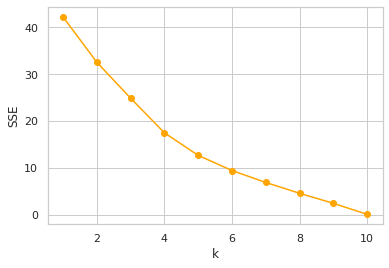

In [944]:
SSE = []
for k in range(1,11):
    clf=KMeans(n_clusters=k, random_state=42)
    clf.fit(cluster3_minmax)
    SSE.append(clf.inertia_)
    
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(1,11),SSE,'o-', color='orange')

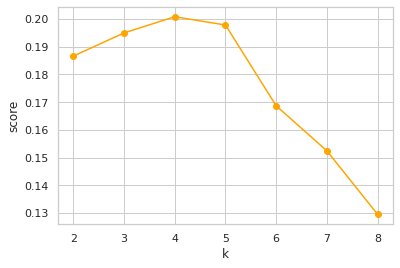

In [945]:
Scores=[]
for k in range(2,9):
    clf=KMeans(n_clusters=k, random_state=42)
    clf.fit(cluster3_minmax)
    Scores.append(silhouette_score(cluster3_minmax,clf.labels_,metric='euclidean'))
    
plt.xlabel('k')
plt.ylabel('score')
plt.plot(range(2,9),Scores,'o-', color='orange')

#### 使用k-means分层

In [946]:
clf = KMeans(n_clusters=4, random_state=42)
clf.fit(cluster3_minmax)
Labels=clf.labels_
cluster3['labels']=Labels

In [996]:
cluster3 = cluster3.sort_values(by='labels',ascending=True)
cluster3 = cluster3
cluster3.head(11)

index            ï»¿station                            Accommodation  \
0       0      Clapham Junction                                   0.0023   
1       1  Highbury & Islington                                   0.0000   
2       2           Kings Cross                                   0.0679   
3       3            Paddington                                   0.1801   
4       4            St pancras                                   0.0694   
5       5              Victoria                                   0.0689   
6       6              Waterloo                                   0.0248   
7       7               Barking                                   0.0093   
8       8      liverpool street                                   0.0149   
9       9         Oxford Circus                                   0.0083   
10     10             Stratford                                   0.0120   

                         Auto & Accessories  \
0                                    0.0012   
1                                    0.0016   
2                                    0.0000   
3                                    0.0000   
4                                    0.0000   
5                                    0.0000   
6                                    0.0000   
7                                    0.0000   
8                                    0.0000   
9                                    0.0000   
10                                   0.0000   

                              Auto Services  \
0                                    0.0035   
1                                    0.0047   
2                                    0.0115   
3                                    0.0136   
4                                    0.0110   
5                                    0.0083   
6                                    0.0131   
7                                    0.0037   
8                                    0.0007   
9                                    0.0000   
10                                   0.0065   

                                     Bakers  \
0                                    0.0117   
1                                    0.0158   
2                                    0.0106   
3                                    0.0091   
4                                    0.0110   
5                                    0.0138   
6                                    0.0105   
7                                    0.0056   
8                                    0.0060   
9                                    0.0059   
10                                   0.0098   

    Banks, Financial Services & Building Societies  \
0                                           0.0117   
1                                           0.0063   
2                                           0.0176   
3                                           0.0351   
4                                           0.0186   
5                                           0.0175   
6                                           0.0039   
7                                           0.0149   
8                                           0.0216   
9                                           0.0086   
10                                          0.0174   

                         Bars, Pubs & Clubs  \
0                                    0.0524   
1                                    0.0633   
2                                    0.0459   
3                                    0.0328   
4                                    0.0508   
5                                    0.0423   
6                                    0.0562   
7                                    0.0131   
8                                    0.0767   
9                                    0.0454   
10                                   0.0272   

    Books, Arts & Crafts, Stationery, Printers  \
0                                       0.0163   
1                                       0.0111   
2                               

In [983]:
centers= cluster3.groupby('labels').mean()
centers

Accommodation  \
labels                                            
0                                        0.0012   
1                                        0.0822   
2                                        0.0093   
3                                        0.0117   

                             Auto & Accessories  \
labels                                            
0                                        0.0014   
1                                        0.0000   
2                                        0.0000   
3                                        0.0000   

                                  Auto Services  \
labels                                            
0                                        0.0041   
1                                        0.0115   
2                                        0.0037   
3                                        0.0024   

                                         Bakers  \
labels                                            
0                                        0.0137   
1                                        0.0110   
2                                        0.0056   
3                                        0.0072   

        Banks, Financial Services & Building Societies  \
labels                                                   
0                                               0.0090   
1                                               0.0186   
2                                               0.0149   
3                                               0.0159   

                             Bars, Pubs & Clubs  \
labels                                            
0                                        0.0579   
1                                        0.0456   
2                                        0.0131   
3                                        0.0498   

        Books, Arts & Crafts, Stationery, Printers  \
labels                                               
0                                           0.0137   
1                                           0.0354   
2                                           0.0093   
3                                           0.0310   

                         Butchers & Fishmongers  \
labels                                            
0                                        0.0023   
1                                        0.0011   
2                                        0.0187   
3                                        0.0014   

                              Cafes & Fast Food  \
labels                                            
0                                        0.1103   
1                                        0.1450   
2                                        0.1269   
3                                        0.1260   

                      Car & Motorbike Showrooms  ...  \
labels                                           ...   
0                                        0.0020  ...   
1                                        0.0019  ...   
2                                        0.0037  ...   
3                                        0.0053  ...   

                                  Miscellaneous  \
labels                                            
0                                        0.0088   
1                                        0.0128   
2                                        0.0187   
3                                        0.0050   

                                   Off Licenses  \
labels                                            
0                                        0.0124   
1                                        0.0030   
2                                        0.0037   
3                                        0.0029   

                   Pawnbroking & Cheque Cashing  \
labels                                            
0                                        0.0020   
1                                        0.0023   
2                                        0.0112   
3    

In [984]:
centers=centers.T
centers.head(5)

labels                                                                                0  \
Accommodation                                                                    0.0012   
Auto & Accessories                                                               0.0014   
Auto Services                                                                    0.0041   
Bakers                                                                           0.0137   
Banks, Financial Services & Building Societies                                   0.0090   

labels                                                                                1  \
Accommodation                                                                    0.0822   
Auto & Accessories                                                               0.0000   
Auto Services                                                                    0.0115   
Bakers                                                                           0.0110   
Banks, Financial Services & Building Societies                                   0.0186   

labels                                                                                2  \
Accommodation                                                                    0.0093   
Auto & Accessories                                                               0.0000   
Auto Services                                                                    0.0037   
Bakers                                                                           0.0056   
Banks, Financial Services & Building Societies                                   0.0149   

labels                                                                                3  
Accommodation                                                                    0.0117  
Auto & Accessories                                                               0.0000  
Auto Services                                                                    0.0024  
Bakers                                                                           0.0072  
Banks, Financial Services & Building Societies                                   0.0159

In [973]:
centers.to_csv('centersratio.csv', index=False)

In [991]:
centersratio= pd.read_csv('centersratio.csv', encoding = 'unicode_escape')
centersratio.head(5)

Category  \
0                           Restaurants   
1         Hairdressing, Health & Beauty   
2                     Cafes & Fast Food   
3                       Vacant Property   
4  Groceries, Supermarkets & Food Shops   

                                        C1  \
0                                   0.1313   
1                                   0.1213   
2                                   0.1103   
3                                   0.1075   
4                                   0.0677   

                                        C2  \
0                                   0.1200   
1                                   0.0745   
2                                   0.1450   
3                                   0.1039   
4                                   0.0491   

                                        C3  \
0                                   0.0522   
1                                   0.1250   
2                                   0.1269   
3                                   0.1157   
4                                   0.0914   

                                        C4  
0                                   0.1039  
1                                   0.0716  
2                                   0.1260  
3                                   0.1406  
4                                   0.0253

In [992]:
centersratio = centersratio.merge(classification,how='left', on='Category' )

centersratio.sample(10)

Category  \
5                      Bars, Pubs & Clubs   
0                             Restaurants   
40                     Auto & Accessories   
41                          Accommodation   
24                                Medical   
10  Electrical Goods & Home Entertainment   
35              Discount & Surplus Stores   
18             Charity & Secondhand Shops   
29           Gifts, China & Leather Goods   
31         Department Stores & Mail Order   

                                         C1  \
5                                    0.0579   
0                                    0.1313   
40                                   0.0014   
41                                   0.0012   
24                                   0.0085   
10                                   0.0227   
35                                   0.0022   
18                                   0.0115   
29                                   0.0047   
31                                   0.0037   

                                         C2  \
5                                    0.0456   
0                                    0.1200   
40                                   0.0000   
41                                   0.0822   
24                                   0.0096   
10                                   0.0143   
35                                   0.0005   
18                                   0.0025   
29                                   0.0220   
31                                   0.0030   

                                         C3  \
5                                    0.0131   
0                                    0.0522   
40                                   0.0000   
41                                   0.0093   
24                                   0.0112   
10                                   0.0448   
35                                   0.0131   
18                                   0.0149   
29                                   0.0019   
31                                   0.0019   

                                         C4 Classification  
5                                    0.0498        Leisure  
0                                    0.1039        Leisure  
40                                   0.0000        Service  
41                                   0.0117        Leisure  
24                                   0.0084  Miscellaneous  
10                                   0.0297     Comparison  
35                                   0.0011     Comparison  
18                                   0.0013     Comparison  
29                                   0.0107     Comparison  
31                                   0.0027     Comparison

In [994]:
centersratio.to_csv('centersratio.csv', index=False)

## 3. Feature importance by random forest

### 3.1 view data properties 

In [443]:
poi.head(5)

Station  stationtype                             Name         Street  \
0  Oxford Circus            4                        Disotto's  Regent Street   
1  Oxford Circus            4                        Ice Cream  Regent Street   
2  Oxford Circus            4  International Currency Exchange  Oxford Street   
3  Oxford Circus            4                         Niketown  Oxford Street   
4  Oxford Circus            4             Stargreen Box Office  Argyll Street   

  PostCode   BusinessTy                    SubCategor  \
0  W1B 2EP  Independent            Ice Cream Parlours   
1  W1B 2EP  Independent            Ice Cream Parlours   
2  W1D 2LT     Multiple             Bureaux de Change   
3  W1C 1DE     Multiple            Sports Goods Shops   
4  W1F 7TT  Independent  Ticket Outlets & Box Offices   

                                         Category CreatedDat createtime  \
0            Groceries, Supermarkets & Food Shops  2019/5/16     before   
1            Groceries, Supermarkets & Food Shops  2018/5/18     before   
2  Banks, Financial Services & Building Societies  1999/5/22     before   
3             Sports, Toys, Cycle Shops & Hobbies  1999/8/27     before   
4                                   Entertainment  2001/2/16     before   

   ClosedDate closedtime  closedtimecode  IsNew  \
0  2019/11/19  until2017               2      1   
1   2018/11/1  until2017               2      1   
2  2021/10/28     during               3      1   
3         NaN       open               5      1   
4  2019/11/19  until2017               2      1   

                                 Longitude  \
0                                  -0.1419   
1                                  -0.1419   
2                                  -0.1415   
3                                  -0.1419   
4                                  -0.1411   

                                  Latitude RetailMix   Classifica  circle  
0                                  51.5149       non  Convenience       1  
1                                  51.5149       non  Convenience       1  
2                                  51.5153       non      Service       1  
3                                  51.5154      Mass   Comparison       1  
4                                  51.5149       non      Leisure       1

In [446]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14754 entries, 0 to 14753
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station         14754 non-null  object 
 1   stationtype     14754 non-null  object 
 2   Name            14754 non-null  object 
 3   Street          14754 non-null  object 
 4   PostCode        14754 non-null  object 
 5   BusinessTy      14754 non-null  object 
 6   SubCategor      14754 non-null  object 
 7   Category        14754 non-null  object 
 8   CreatedDat      14754 non-null  object 
 9   createtime      14754 non-null  object 
 10  ClosedDate      5446 non-null   object 
 11  closedtime      14754 non-null  object 
 12  closedtimecode  14754 non-null  int64  
 13  IsNew           14754 non-null  object 
 14  Longitude       14744 non-null  float64
 15  Latitude        14744 non-null  float64
 16  RetailMix       14754 non-null  object 
 17  Classifica      14754 non-null 

In [445]:
poi['circle'] = poi['circle'].astype(str)
poi['IsNew'] = poi['IsNew'].astype(str)
poi['stationtype'] = poi['stationtype'].astype(str)

In [348]:
poi.describe().T

count  \
Longitude                              14,744.0000   
Latitude                               14,744.0000   

                                              mean  \
Longitude                                  -0.1116   
Latitude                                   51.5165   

                                               std  \
Longitude                                   0.0551   
Latitude                                    0.0186   

                                               min  \
Longitude                                  -0.1836   
Latitude                                   51.4577   

                                               25%  \
Longitude                                  -0.1428   
Latitude                                   51.5113   

                                               50%  \
Longitude                                  -0.1264   
Latitude                                   51.5169   

                                               75%  \
Longitude                                  -0.0844   
Latitude                                   51.5282   

                                               max  
Longitude                                   0.0865  
Latitude                                   51.5540

In [350]:
poi.describe(include=['object']).T

count unique                top   freq
Station      14754     11      Oxford Circus   4072
stationtype  14754      5                  5   6088
Name         14754   8794    Vacant Property   1860
Street       14754    679    Montfichet Road    542
PostCode     14754   3547            E20 1EL    302
BusinessTy   14754      3        Independent   8099
SubCategor   14754    326  Vacant Properties   1860
Category     14754     42  Cafes & Fast Food   1934
CreatedDat   14754   2315          1999/12/2    194
createtime   14754      3             before  12036
ClosedDate    5446    790         2019/11/19    128
closedtime   14754      6               open   8223
IsNew        14754      2                  1  11910
RetailMix    14754      4                non  13083
Classifica   14754      6            Leisure   5135
circle       14754      5                  4   7391

In [447]:
# check for missing values

poi.isnull().sum()

Station              0
stationtype          0
Name                 0
Street               0
PostCode             0
BusinessTy           0
SubCategor           0
Category             0
CreatedDat           0
createtime           0
ClosedDate        9308
closedtime           0
closedtimecode       0
IsNew                0
Longitude           10
Latitude            10
RetailMix            0
Classifica           0
circle               0
dtype: int64

In [295]:
def initial_eda(poi):
    if isinstance(poi, pd.DataFrame):
        total_na = poi.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (poi.shape[0], poi.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = poi.columns
        dtyp = poi.dtypes
        uniq = poi.nunique()
        na_val = poi.isna().sum()
        for i in range(len(poi.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(poi)))

In [448]:
initial_eda(poi)

Dimensions : 14754 rows, 19 columns
Total NA Values : 9328 
                           Column Name  Data Type      #Distinct  NA Values
                               Station     object           11          0
                           stationtype     object            5          0
                                  Name     object         8794          0
                                Street     object          679          0
                              PostCode     object         3547          0
                            BusinessTy     object            3          0
                            SubCategor     object          326          0
                              Category     object           42          0
                            CreatedDat     object         2315          0
                            createtime     object            3          0
                            ClosedDate     object          790       9308
                            closedtime     object 

### 3.2 detect categorical variabls

In [353]:
categorical = [var for var in poi.columns if poi[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 16 categorical variables

The categorical variables are :

 ['Station', 'stationtype', 'Name', 'Street', 'PostCode', 'BusinessTy', 'SubCategor', 'Category', 'CreatedDat', 'createtime', 'ClosedDate', 'closedtime', 'IsNew', 'RetailMix', 'Classifica', 'circle']


In [354]:
poi[categorical].head()

Station stationtype                             Name         Street  \
0  Oxford Circus           4                        Disotto's  Regent Street   
1  Oxford Circus           4                        Ice Cream  Regent Street   
2  Oxford Circus           4  International Currency Exchange  Oxford Street   
3  Oxford Circus           4                         Niketown  Oxford Street   
4  Oxford Circus           4             Stargreen Box Office  Argyll Street   

  PostCode   BusinessTy                    SubCategor  \
0  W1B 2EP  Independent            Ice Cream Parlours   
1  W1B 2EP  Independent            Ice Cream Parlours   
2  W1D 2LT     Multiple             Bureaux de Change   
3  W1C 1DE     Multiple            Sports Goods Shops   
4  W1F 7TT  Independent  Ticket Outlets & Box Offices   

                                         Category CreatedDat createtime  \
0            Groceries, Supermarkets & Food Shops  2019/5/16     before   
1            Groceries, Supermarkets & Food Shops  2018/5/18     before   
2  Banks, Financial Services & Building Societies  1999/5/22     before   
3             Sports, Toys, Cycle Shops & Hobbies  1999/8/27     before   
4                                   Entertainment  2001/2/16     before   

   ClosedDate closedtime IsNew RetailMix   Classifica circle  
0  2019/11/19  until2017     1       non  Convenience      1  
1   2018/11/1  until2017     1       non  Convenience      1  
2  2021/10/28     during     1       non      Service      1  
3         NaN       open     1      Mass   Comparison      1  
4  2019/11/19  until2017     1       non      Leisure      1

closedtime is the target variable.

In [370]:
# check the frequency distribution of categorical variables.
for var in categorical: 
    
    print(poi[var].value_counts())

Oxford Circus           4072
liverpool street        2685
St pancras              1181
Kings Cross             1134
Victoria                1088
Stratford                920
Paddington               883
Clapham Junction         858
Waterloo                 765
Highbury & Islington     632
Barking                  536
Name: Station, dtype: int64
5    6088
4    4072
1    2026
2    1648
3     920
Name: stationtype, dtype: int64
Vacant Property         1860
Pret A Manger             97
Starbucks Coffee          53
Costa                     47
Boots The Chemist         39
                        ... 
Amirah                     1
Deshy Grill                1
Eggfree Cake Box           1
Best Kebab                 1
Northcote Pet Stores       1
Name: Name, Length: 8794, dtype: int64
Montfichet Road           542
Euston Road               472
Oxford Street             312
Buckingham Palace Road    278
Marchmont Street          278
                         ... 
Bruton Lane                 1
Llo

In [302]:
# Percentage of frequency distribution of values.

for var in categorical:
    
     print(poi[var].value_counts()/np.float(len(poi)))

Oxford Circus                                            0.2760
liverpool street                                         0.1820
St pancras                                               0.0800
Kings Cross                                              0.0769
Victoria                                                 0.0737
Stratford                                                0.0624
Paddington                                               0.0598
Clapham Junction                                         0.0582
Waterloo                                                 0.0519
Highbury & Islington                                     0.0428
Barking                                                  0.0363
Name: Station, dtype: float64
Vacant Property                                          0.1261
Pret A Manger                                            0.0066
Starbucks Coffee                                         0.0036
Costa                                                    0.0032
Boots The 

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


#### 3.2.1 Explore the variables

#### Explore income target variable

rename some categorical variables.(waiting to do)

In [365]:
closed = poi.loc[(poi.closedtime != "open") & (poi.closedtime != "vacant")]
closed

Station stationtype                             Name  \
0         Oxford Circus           4                        Disotto's   
1         Oxford Circus           4                        Ice Cream   
2         Oxford Circus           4  International Currency Exchange   
4         Oxford Circus           4             Stargreen Box Office   
5         Oxford Circus           4                    Mamas & Papas   
...                 ...         ...                              ...   
14745  Clapham Junction           1                 The Dry Cleaners   
14746  liverpool street           5          Shoreditch Dry Cleaners   
14750  liverpool street           5                 That Flower Shop   
14751          Victoria           5                    Wild At Heart   
14752          Victoria           5                 Landscape London   

                       Street  PostCode   BusinessTy  \
0               Regent Street   W1B 2EP  Independent   
1               Regent Street   W1B 2EP  Independent   
2               Oxford Street   W1D 2LT     Multiple   
4               Argyll Street   W1F 7TT  Independent   
5               Regent Street   W1B 3AF     Multiple   
...                       ...       ...          ...   
14745          Northcote Road  SW11 6PL  Independent   
14746  Shoreditch High Street    E1 6JE  Independent   
14750  Shoreditch High Street    E1 6JN  Independent   
14751            Pimlico Road  SW1W 8LP     Multiple   
14752            Pimlico Road  SW1W 8NE  Independent   

                         SubCategor  \
0                Ice Cream Parlours   
1                Ice Cream Parlours   
2                 Bureaux de Change   
4      Ticket Outlets & Box Offices   
5       Nursery Goods & Accessories   
...                             ...   
14745                  Dry Cleaners   
14746                  Dry Cleaners   
14750                      Florists   
14751                      Florists   
14752           Landscape Gardeners   

                                                Category  CreatedDat  \
0                   Groceries, Supermarkets & Food Shops   2019/5/16   
1                   Groceries, Supermarkets & Food Shops   2018/5/18   
2         Banks, Financial Services & Building Societies   1999/5/22   
4                                          Entertainment   2001/2/16   
5      Furniture, Carpets, Textiles, Bathrooms & Kitc...  2007/10/22   
...                                                  ...         ...   
14745                 Launderettes, Dry Cleaners & Other    2006/9/1   
14746                 Launderettes, Dry Cleaners & Other   2009/1/16   
14750                                  Florists & Garden    2014/4/7   
14751                                  Florists & Garden   2009/2/19   
14752                                  Florists & Garden   2007/5/31   

      createtime  ClosedDate closedtime IsNew  \
0         before  2019/11/19  until2017     1   
1         before   2018/11/1  until2017     1   
2         before  2021/10/28     during     1   
4         before  2019/11/19  until2017     1   
5         before  2012/11/29     before     1   
...          ...         ...        ...   ...   
14745     before  2007/12/24     before     1   
14746     before  2021/12/13     during     1   
14750     before  2020/12/18     during     1   
14751     before    2011/6/1     before     1   
14752     before    2008/8/6     before     1   

                                     Longitude  \
0                                      -0.1419   
1                                      -0.1419   
2                                      -0.1415   
4                                      -0.1411   
5                                      -0.1416   
...                                        ...   
14745                                  -0.1658   
14746                                  -0.0781   
14750                                  -0.0776   
14751                                  -0.1540   
14752

In [377]:
opening = poi.loc[poi.closedtime == "open"]
opening

Station stationtype                  Name  \
3             Oxford Circus           4              Niketown   
6             Oxford Circus           4   Dutch Mini Pancakes   
11            Oxford Circus           4           Sweet Touch   
12            Oxford Circus           4               Finlays   
13            Oxford Circus           4           Argyll News   
...                     ...         ...                   ...   
14689         Oxford Circus           4                  Case   
14747      liverpool street           5   Luxury Dry Cleaners   
14748         Oxford Circus           4      Fitzroy Cleaners   
14749  Highbury & Islington           1         Dansk Flowers   
14753      Clapham Junction           1  Northcote Pet Stores   

                 Street  PostCode   BusinessTy                SubCategor  \
3         Oxford Street   W1C 1DE     Multiple        Sports Goods Shops   
6         Regent Street   W1B 2EP  Independent      Take Away Food Shops   
11        Oxford Street   W1D 2LR  Independent             Confectioners   
12        Oxford Street   W1D 2LP  Independent                Newsagents   
13        Argyll Street   W1F 7TT  Independent                Newsagents   
...                 ...       ...          ...                       ...   
14689        Piccadilly   W1J 9EJ  Independent             Luggage Shops   
14747        Old Street  EC1V 9LA  Independent              Dry Cleaners   
14748  Cleveland Street   W1T 6NL  Independent              Dry Cleaners   
14749      Upper Street    N1 2TX  Independent                  Florists   
14753    Northcote Road  SW11 6QN  Independent  Pet Shops & Pet Supplies   

                                  Category  CreatedDat createtime ClosedDate  \
3      Sports, Toys, Cycle Shops & Hobbies   1999/8/27     before        NaN   
6                        Cafes & Fast Food  2019/11/19     before        NaN   
11      Confectionery, Tobacco, Newsagents   2008/9/25     before        NaN   
12      Confectionery, Tobacco, Newsagents   2015/7/27     before        NaN   
13      Confectionery, Tobacco, Newsagents  2019/11/19     before        NaN   
...                                    ...         ...        ...        ...   
14689         Gifts, China & Leather Goods   2015/5/26     before        NaN   
14747   Launderettes, Dry Cleaners & Other   2016/9/15     before        NaN   
14748   Launderettes, Dry Cleaners & Other   2001/1/24     before        NaN   
14749                    Florists & Garden   2008/12/9     before        NaN   
14753             Pet Shops & Pet Supplies   1999/12/2     before        NaN   

      closedtime IsNew                                Longitude  \
3           open     1                                  -0.1419   
6           open     1                                  -0.1419   
11          open     1                                  -0.1412   
12          open     1                                  -0.1417   
13          open     1                                  -0.1411   
...          ...   ...                                      ...   
14689       open     1                                  -0.1397   
14747       open     1                                  -0.0815   
14748       open     1                                  -0.1411   
14749       open     1                                  -0.1021   
14753       open     1                                  -0.1661   

                                      Latitude RetailMix   Classifica circle  
3                                      51.5154      Mass   Comparison      1  
6                                      51.5149       non      Leisure      1  
11                                     51.5153       non  Convenience      1  
12                                     51.5153       non  Convenience      1  
13                                     51.5149       non  Convenience      1  
...                                        ...       ...          ...    ...  
14689  

In [304]:
# check for missing values
poi['closedtime'].isnull().sum()

0

In [303]:
# view number of unique values

poi['closedtime'].nunique()

6

In [305]:
# view the unique values

poi['closedtime'].unique()

array(['until2017', 'during', 'open', 'before', 'post', 'vacant'],
      dtype=object)

In [306]:
# view the frequency distribution of values

poi['closedtime'].value_counts()

open         8223
during       2015
vacant       1839
until2017    1686
before        625
post          366
Name: closedtime, dtype: int64

In [307]:
# view percentage of frequency distribution of values

poi['closedtime'].value_counts()/len(poi)

open                                          0.5573
during                                        0.1366
vacant                                        0.1246
until2017                                     0.1143
before                                        0.0424
post                                          0.0248
Name: closedtime, dtype: float64

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

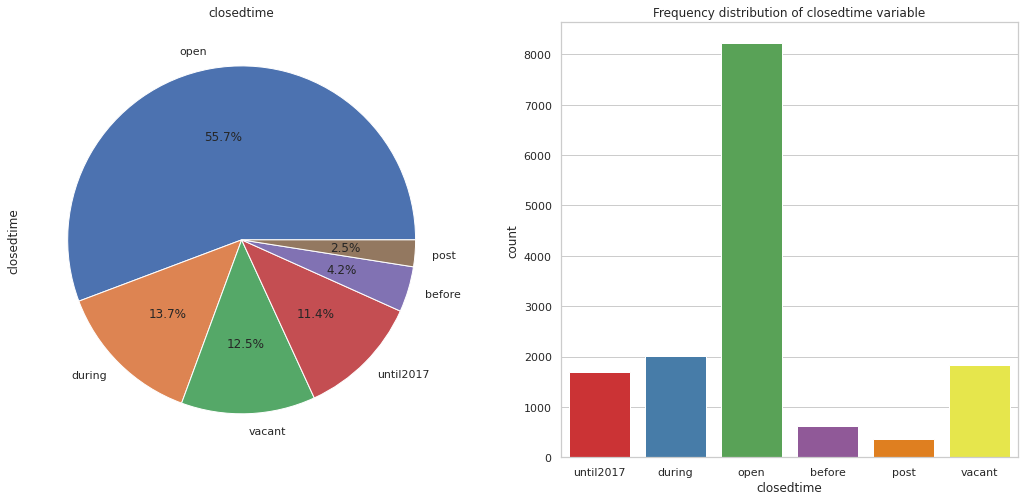

In [315]:
# visualize frequency distribution of closedtime variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = poi['closedtime'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('closedtime')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="closedtime", data=poi, palette="Set1")
ax[1].set_title("Frequency distribution of closedtime variable")

plt.show()

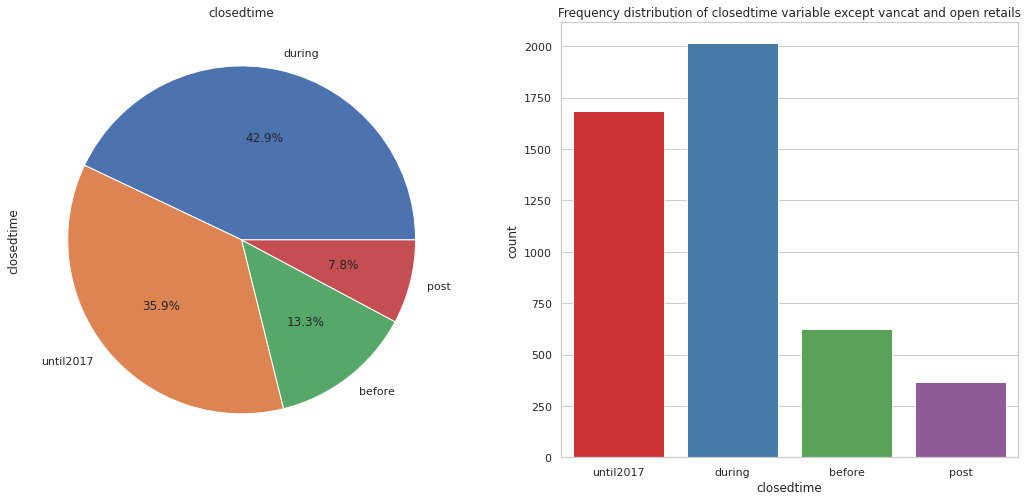

In [372]:
# visualize frequency distribution of closedtime variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = closed['closedtime'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('closedtime')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="closedtime", data=closed, palette="Set1")
ax[1].set_title("Frequency distribution of closedtime variable except vancat and open retails")

plt.show()

Visualize cirlce wrt closedtime variable.

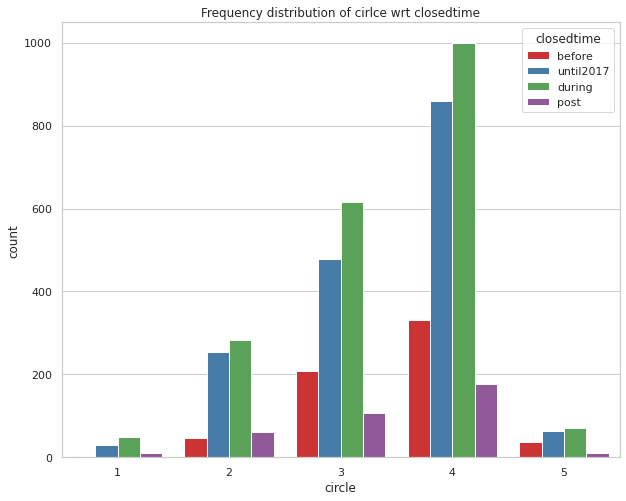

In [1015]:
f, ax = plt.subplots(figsize=(10, 8))
hue_order = ['before', 'until2017', 'during','post']
ax = sns.countplot(x="circle", hue="closedtime", data=poi, hue_order=hue_order, palette="Set1")
ax.set_title("Frequency distribution of cirlce wrt closedtime")
plt.show()

**<font color=#FF0000> Q: </font>** Is it misleading that the radius division metric is not uniformly distributed? (1:50m,2:51-200m, 3:201-400m, 4: 401-800m, 5:800m-)

Visualize retail classification wrt closedtime variable.

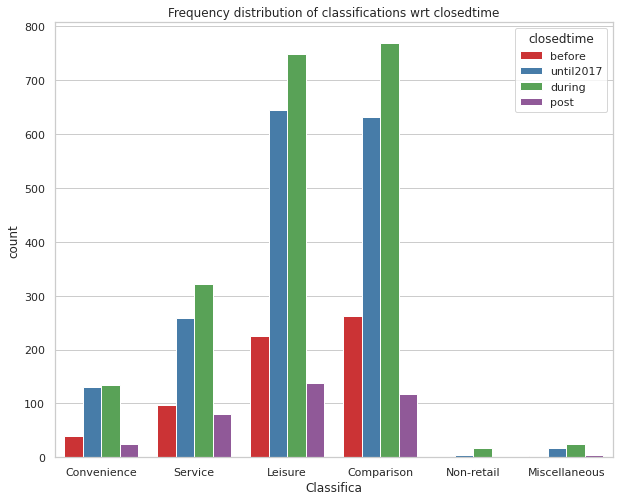

In [1014]:
f, ax = plt.subplots(figsize=(10, 8))
hue_order = ['before', 'until2017', 'during','post']
ax = sns.countplot(x="Classifica", hue="closedtime", data=closed, hue_order=hue_order,palette="Set1")
ax.set_title("Frequency distribution of classifications wrt closedtime")

plt.show()

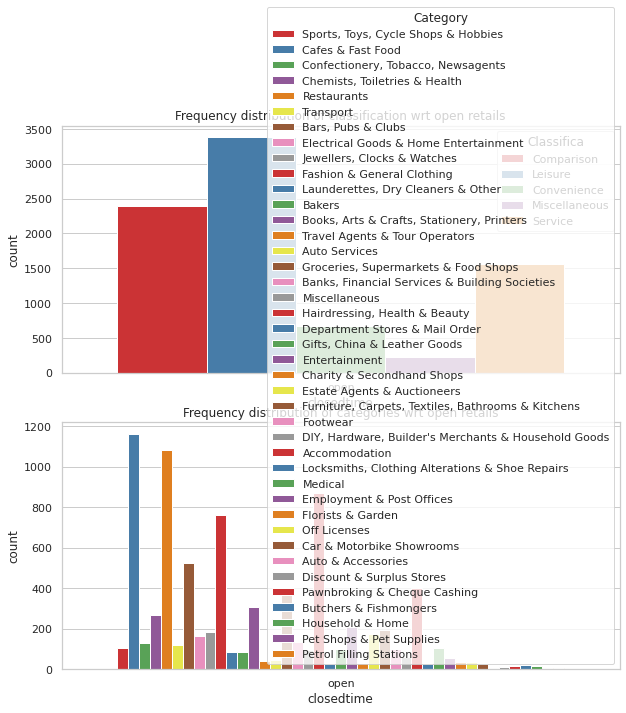

In [402]:
f, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0] = sns.countplot(x="closedtime", hue="Classifica", data=opening, ax=ax[0], palette="Set1",
                      order=opening['closedtime'].value_counts(ascending=False).index)
ax[0].set_title("Frequency distribution of classification wrt open retails")


ax[1] = sns.countplot(x="closedtime", hue="Category", data=opening, palette="Set1")
ax[1].set_title("Frequency distribution of categories wrt open retails")


plt.show()

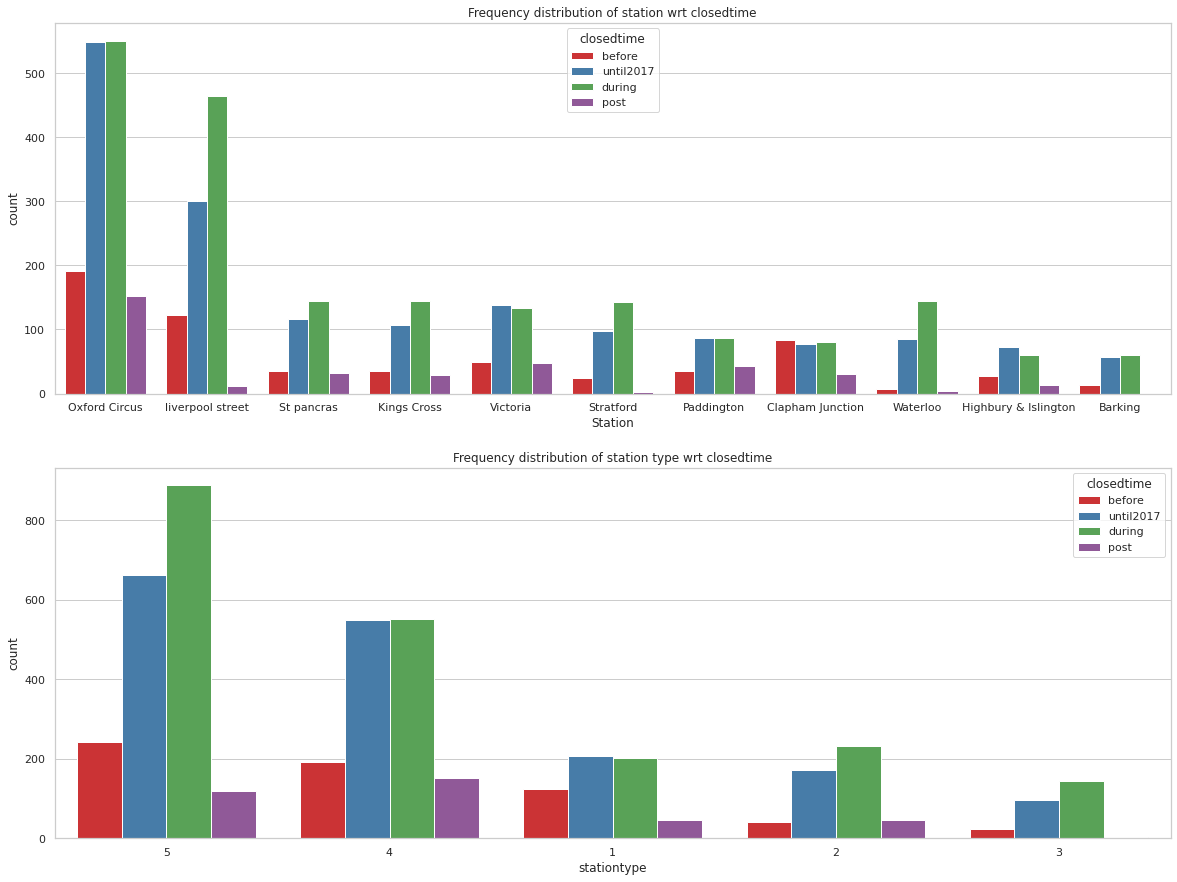

In [1012]:
f, ax = plt.subplots(2,1,figsize=(20, 15))
hue_order = ['before', 'until2017', 'during','post']
ax[0] = sns.countplot(x="Station", hue="closedtime", data=poi,ax=ax[0], hue_order=hue_order,palette="Set1",
                     order = poi['Station'].value_counts().index)
ax[0].set_title("Frequency distribution of station wrt closedtime")

ax[1] = sns.countplot(x="stationtype", hue="closedtime", hue_order=hue_order,data=poi, palette="Set1",order = poi['stationtype'].value_counts().index)
ax[1].set_title("Frequency distribution of station type wrt closedtime")

plt.show()

station type
1: Barking, Clapham Junction, Highbury & Islington;
2: Paddington, Waterloo;
3: Stratford;
4: OXford circus;
5: King's cross, St pancras, Victoria, liverpool street

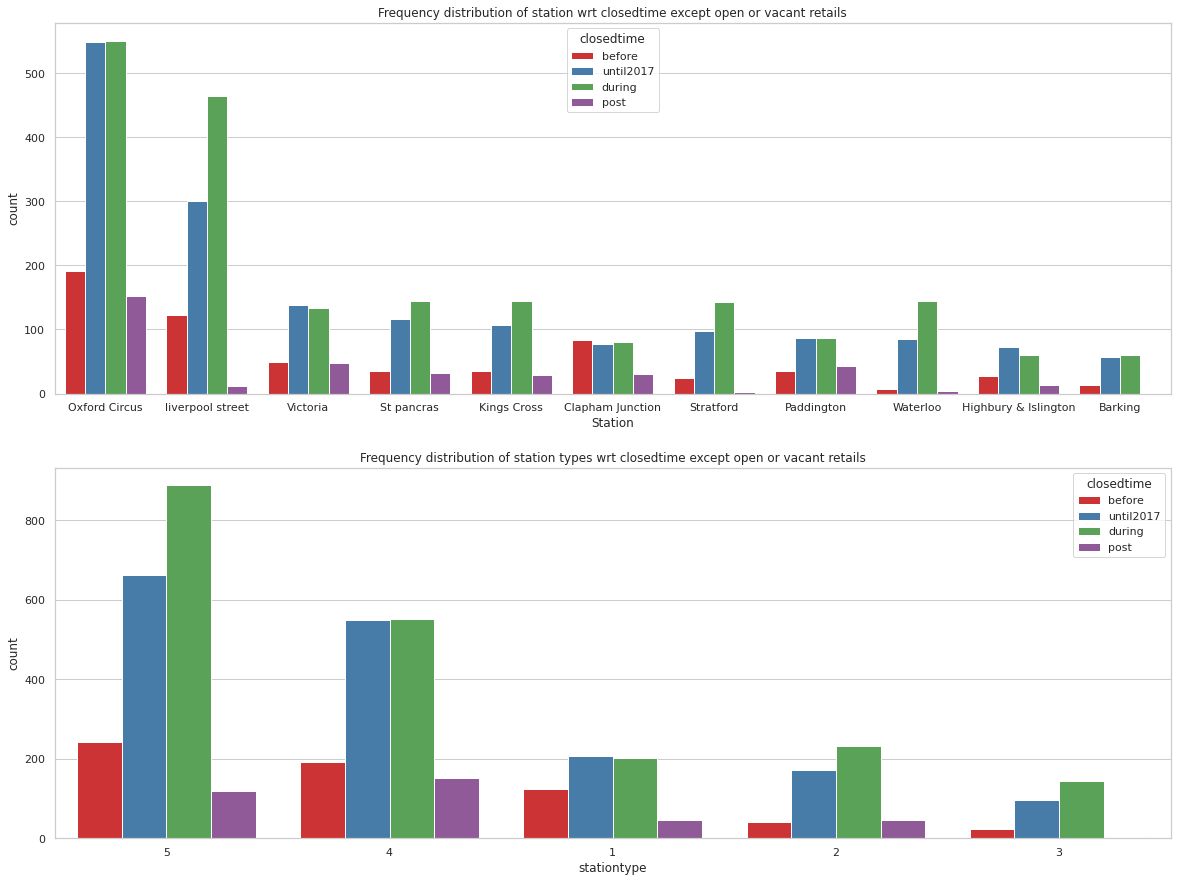

In [1013]:
f, ax = plt.subplots(2,1,figsize=(20, 15))
hue_order = ['before', 'until2017', 'during','post']
ax[0] = sns.countplot(x="Station", hue="closedtime",hue_order=hue_order, data=closed,ax=ax[0], palette="Set1",order = closed['Station'].value_counts().index)
ax[0].set_title("Frequency distribution of station wrt closedtime except open or vacant retails")

ax[1] = sns.countplot(x="stationtype", hue="closedtime",hue_order=hue_order, data=closed, palette="Set1",order = closed['stationtype'].value_counts().index)
ax[1].set_title("Frequency distribution of station types wrt closedtime except open or vacant retails")
plt.show()

station type
1: Barking, Clapham Junction, Highbury & Islington;
2: Paddington, Waterloo;
3: Stratford;
4: OXford circus;
5: King's cross, St pancras, Victoria, liverpool street

### 3.4 Number of labels: Cardinality

The number of labels within a categorical variable is known as cardinality.

A high number of labels within a variable is known as high cardinality.

High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [490]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(poi[var].unique()), ' labels')

Station  contains  11  labels
stationtype  contains  5  labels
Name  contains  8794  labels
Street  contains  679  labels
PostCode  contains  3547  labels
BusinessTy  contains  3  labels
SubCategor  contains  326  labels
Category  contains  42  labels
CreatedDat  contains  2315  labels
createtime  contains  3  labels
ClosedDate  contains  791  labels
closedtime  contains  6  labels
IsNew  contains  2  labels
RetailMix  contains  4  labels
Classifica  contains  6  labels
circle  contains  5  labels


### 3.5 Declare feature vector and target variable

In [670]:
#poiduring=poi.loc[poi['closedtimecode'] == 3]
#poiduring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 2 to 14750
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station         2015 non-null   object 
 1   stationtype     2015 non-null   object 
 2   Name            2015 non-null   object 
 3   Street          2015 non-null   object 
 4   PostCode        2015 non-null   object 
 5   BusinessTy      2015 non-null   object 
 6   SubCategor      2015 non-null   object 
 7   Category        2015 non-null   object 
 8   CreatedDat      2015 non-null   object 
 9   createtime      2015 non-null   object 
 10  ClosedDate      2015 non-null   object 
 11  closedtime      2015 non-null   object 
 12  closedtimecode  2015 non-null   int64  
 13  IsNew           2015 non-null   object 
 14  Longitude       2013 non-null   float64
 15  Latitude        2013 non-null   float64
 16  RetailMix       2015 non-null   object 
 17  Classifica      2015 non-null   

In [702]:
X = poi.drop(['closedtimecode'], axis=1)

y = poi['closedtimecode']

### 3.6 Split data into separate training and test set

In [703]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [704]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10327, 18), (4427, 18))

In [705]:
y_train

10594    3
11546    5
6256     5
10015    2
3386     6
        ..
13123    5
3264     2
9845     5
10799    5
2732     1
Name: closedtimecode, Length: 10327, dtype: int64

 ### 3.7 Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

#### Display categorical variables in training set

In [706]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Station',
 'stationtype',
 'Name',
 'Street',
 'PostCode',
 'BusinessTy',
 'SubCategor',
 'Category',
 'CreatedDat',
 'createtime',
 'ClosedDate',
 'closedtime',
 'IsNew',
 'RetailMix',
 'Classifica',
 'circle']

In [707]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Station                                         0.0000
stationtype                                     0.0000
Name                                            0.0000
Street                                          0.0000
PostCode                                        0.0000
BusinessTy                                      0.0000
SubCategor                                      0.0000
Category                                        0.0000
CreatedDat                                      0.0000
createtime                                      0.0000
ClosedDate                                      0.6281
closedtime                                      0.0000
IsNew                                           0.0000
RetailMix                                       0.0000
Classifica                                      0.0000
circle                                          0.0000
dtype: float64

In [708]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

ClosedDate 0.6280623608017817


In [709]:
# impute missing categorical variables with most frequent value

for poi2 in [X_train, X_test]:
    poi2['ClosedDate'].fillna(X_train['ClosedDate'].mode()[0], inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [710]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Station        0
stationtype    0
Name           0
Street         0
PostCode       0
BusinessTy     0
SubCategor     0
Category       0
CreatedDat     0
createtime     0
ClosedDate     0
closedtime     0
IsNew          0
RetailMix      0
Classifica     0
circle         0
dtype: int64

In [680]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Station        0
stationtype    0
Name           0
Street         0
PostCode       0
BusinessTy     0
SubCategor     0
Category       0
CreatedDat     0
createtime     0
ClosedDate     0
closedtime     0
IsNew          0
RetailMix      0
Classifica     0
circle         0
dtype: int64

#### Encode categorical variables

In [681]:
X_train[categorical].head()

Station stationtype                    Name  \
4806          Stratford           3           MAC Cosmetics   
9944        Kings Cross           5             China House   
11649  liverpool street           5  Gourmet Burger Kitchen   
822            Victoria           5         Dorothy Perkins   
5199   liverpool street           5           Handelsbanken   

                       Street  PostCode   BusinessTy  \
4806          Montfichet Road   E20 1EP     Multiple   
9944         Marchmont Street  WC1N 1AP  Independent   
11649           Horner Square    E1 6EW     Multiple   
822    Buckingham Palace Road  SW1W 9SJ     Multiple   
5199         New Broad Street  EC2M 1JD     Multiple   

                                 SubCategor  \
4806                        Beauty Products   
9944                   Restaurant - Chinese   
11649                 Restaurant - American   
822                         Clothes - Women   
5199   Banks & Other Financial Institutions   

                                             Category  CreatedDat createtime  \
4806                    Chemists, Toiletries & Health    2016/6/1     before   
9944                                      Restaurants  2014/11/24     before   
11649                                     Restaurants   2010/1/21     before   
822                        Fashion & General Clothing   1999/5/12     before   
5199   Banks, Financial Services & Building Societies   2020/1/10     before   

       ClosedDate closedtime IsNew RetailMix  Classifica circle  
4806    2021/3/29     during     1      Mass  Comparison      3  
9944     2021/5/6     during     1       non     Leisure      4  
11649  2020/12/18     during     1       non     Leisure      4  
822      2021/2/8     during     1      Mass  Comparison      2  
5199    2020/6/11     during     1       non     Service      3

In [682]:
# import category encoders

import category_encoders as ce

In [683]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Station', 'stationtype', 'BusinessTy', 'Category', 'createtime', 
                                 'IsNew', 'RetailMix', 'Classifica','circle'], use_cat_names=True)
encoder

OneHotEncoder(cols=['Station', 'stationtype', 'BusinessTy', 'Category',
                    'createtime', 'IsNew', 'RetailMix', 'Classifica',
                    'circle'],
              use_cat_names=True)

In [684]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [685]:
X_train.head()

Station_Stratford  Station_Kings Cross  Station_liverpool street  \
4806                   1                    0                         0   
9944                   0                    1                         0   
11649                  0                    0                         1   
822                    0                    0                         0   
5199                   0                    0                         1   

       Station_Victoria  Station_Oxford Circus  Station_Highbury & Islington  \
4806                  0                      0                             0   
9944                  0                      0                             0   
11649                 0                      0                             0   
822                   1                      0                             0   
5199                  0                      0                             0   

       Station_St pancras  Station_Paddington  Station_Clapham Junction  \
4806                    0                   0                         0   
9944                    0                   0                         0   
11649                   0                   0                         0   
822                     0                   0                         0   
5199                    0                   0                         0   

       Station_Waterloo  ...  Classifica_Leisure  Classifica_Service  \
4806                  0  ...                   0                   0   
9944                  0  ...                   1                   0   
11649                 0  ...                   1                   0   
822                   0  ...                   0                   0   
5199                  0  ...                   0                   1   

       Classifica_Convenience  Classifica_Non-retail  \
4806                        0                      0   
9944                        0                      0   
11649                       0                      0   
822                         0                      0   
5199                        0                      0   

       Classifica_Miscellaneous  circle_3 circle_4 circle_2 circle_1  circle_5  
4806                          0         1        0        0        0         0  
9944                          0         0        1        0        0         0  
11649                         0         0        1        0        0         0  
822                           0         0        0        1        0         0  
5199                          0         1        0        0        0         0  

[5 rows x 86 columns]

In [686]:
X_train.shape

(1410, 86)

In [687]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 4806 to 4793
Data columns (total 86 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Station_Stratford                                              1410 non-null   int64  
 1   Station_Kings Cross                                            1410 non-null   int64  
 2   Station_liverpool street                                       1410 non-null   int64  
 3   Station_Victoria                                               1410 non-null   int64  
 4   Station_Oxford Circus                                          1410 non-null   int64  
 5   Station_Highbury & Islington                                   1410 non-null   int64  
 6   Station_St pancras                                             1410 non-null   int64  
 7   Station_Paddington                                       

In [688]:
X_test.head()

Station_Stratford  Station_Kings Cross  Station_liverpool street  \
9885                   0                    0                         0   
11196                  0                    0                         1   
10558                  1                    0                         0   
12059                  0                    0                         1   
10300                  0                    1                         0   

       Station_Victoria  Station_Oxford Circus  Station_Highbury & Islington  \
9885                  0                      0                             0   
11196                 0                      0                             0   
10558                 0                      0                             0   
12059                 0                      0                             0   
10300                 0                      0                             0   

       Station_St pancras  Station_Paddington  Station_Clapham Junction  \
9885                    1                   0                         0   
11196                   0                   0                         0   
10558                   0                   0                         0   
12059                   0                   0                         0   
10300                   0                   0                         0   

       Station_Waterloo  ...  Classifica_Leisure  Classifica_Service  \
9885                  0  ...                   0                   0   
11196                 0  ...                   1                   0   
10558                 0  ...                   1                   0   
12059                 0  ...                   0                   0   
10300                 0  ...                   0                   0   

       Classifica_Convenience  Classifica_Non-retail  \
9885                        0                      0   
11196                       0                      0   
10558                       0                      0   
12059                       0                      0   
10300                       0                      0   

       Classifica_Miscellaneous  circle_3 circle_4 circle_2 circle_1  circle_5  
9885                          0         0        1        0        0         0  
11196                         0         0        1        0        0         0  
10558                         0         0        1        0        0         0  
12059                         0         0        1        0        0         0  
10300                         0         0        1        0        0         0  

[5 rows x 86 columns]

In [689]:
X_test.shape

(605, 86)

### 3.8 Feature Scaling 

In [690]:
X_train = X_train.select_dtypes(include=[np.int64])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 4806 to 4793
Data columns (total 77 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   Station_Stratford                                              1410 non-null   int64
 1   Station_Kings Cross                                            1410 non-null   int64
 2   Station_liverpool street                                       1410 non-null   int64
 3   Station_Victoria                                               1410 non-null   int64
 4   Station_Oxford Circus                                          1410 non-null   int64
 5   Station_Highbury & Islington                                   1410 non-null   int64
 6   Station_St pancras                                             1410 non-null   int64
 7   Station_Paddington                                             1410 non-nul

In [691]:
X_test = X_test.select_dtypes(include=[np.int64])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 9885 to 4529
Data columns (total 77 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   Station_Stratford                                              605 non-null    int64
 1   Station_Kings Cross                                            605 non-null    int64
 2   Station_liverpool street                                       605 non-null    int64
 3   Station_Victoria                                               605 non-null    int64
 4   Station_Oxford Circus                                          605 non-null    int64
 5   Station_Highbury & Islington                                   605 non-null    int64
 6   Station_St pancras                                             605 non-null    int64
 7   Station_Paddington                                             605 non-null 

In [692]:
cols = X_train.columns

In [693]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [694]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [695]:
X_test = pd.DataFrame(X_test, columns=[cols])

### 3.9 Random Forest Classifier model with default parameters

In [696]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=10,random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)



# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


### 3.10 Random Forest Classifier model with 100 Decision Trees 

In [697]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


### 3.11 Find important features with Random Forest model 

In [698]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [699]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [700]:
feature_scores

Station_Stratford                                                                                 0.0000
Category_Florists & Garden                                                                        0.0000
Category_Miscellaneous                                                                            0.0000
Category_Household & Home                                                                         0.0000
Category_Charity & Secondhand Shops                                                               0.0000
Category_Discount & Surplus Stores                                                                0.0000
Category_Pawnbroking & Cheque Cashing                                                             0.0000
Category_Transport                                                                                0.0000
Category_Pet Shops & Pet Supplies                                                                 0.0000
Category_DIY, Hardware, Builder's Merchants & Household

In [623]:
feature_scores = feature_scores.to_frame(name="feature_scores").reset_index()
feature_scores = feature_scores.rename(columns={"level_0": "feature"})

In [624]:
feature_scores.head(10)

feature                           feature_scores
0          BusinessTy_Dummy                                   0.1255
1  Category_Vacant Property                                   0.1127
2     Classifica_Non-retail                                   0.0703
3                   IsNew_1                                   0.0575
4                   IsNew_0                                   0.0501
5                  circle_4                                   0.0297
6                  circle_3                                   0.0268
7         createtime_before                                   0.0262
8       BusinessTy_Multiple                                   0.0262
9    BusinessTy_Independent                                   0.0241

#### 3.11.1 Visualize feature scores of the features

ValueError: The number of FixedLocator locations (81), usually from a call to set_ticks, does not match the number of ticklabels (14).

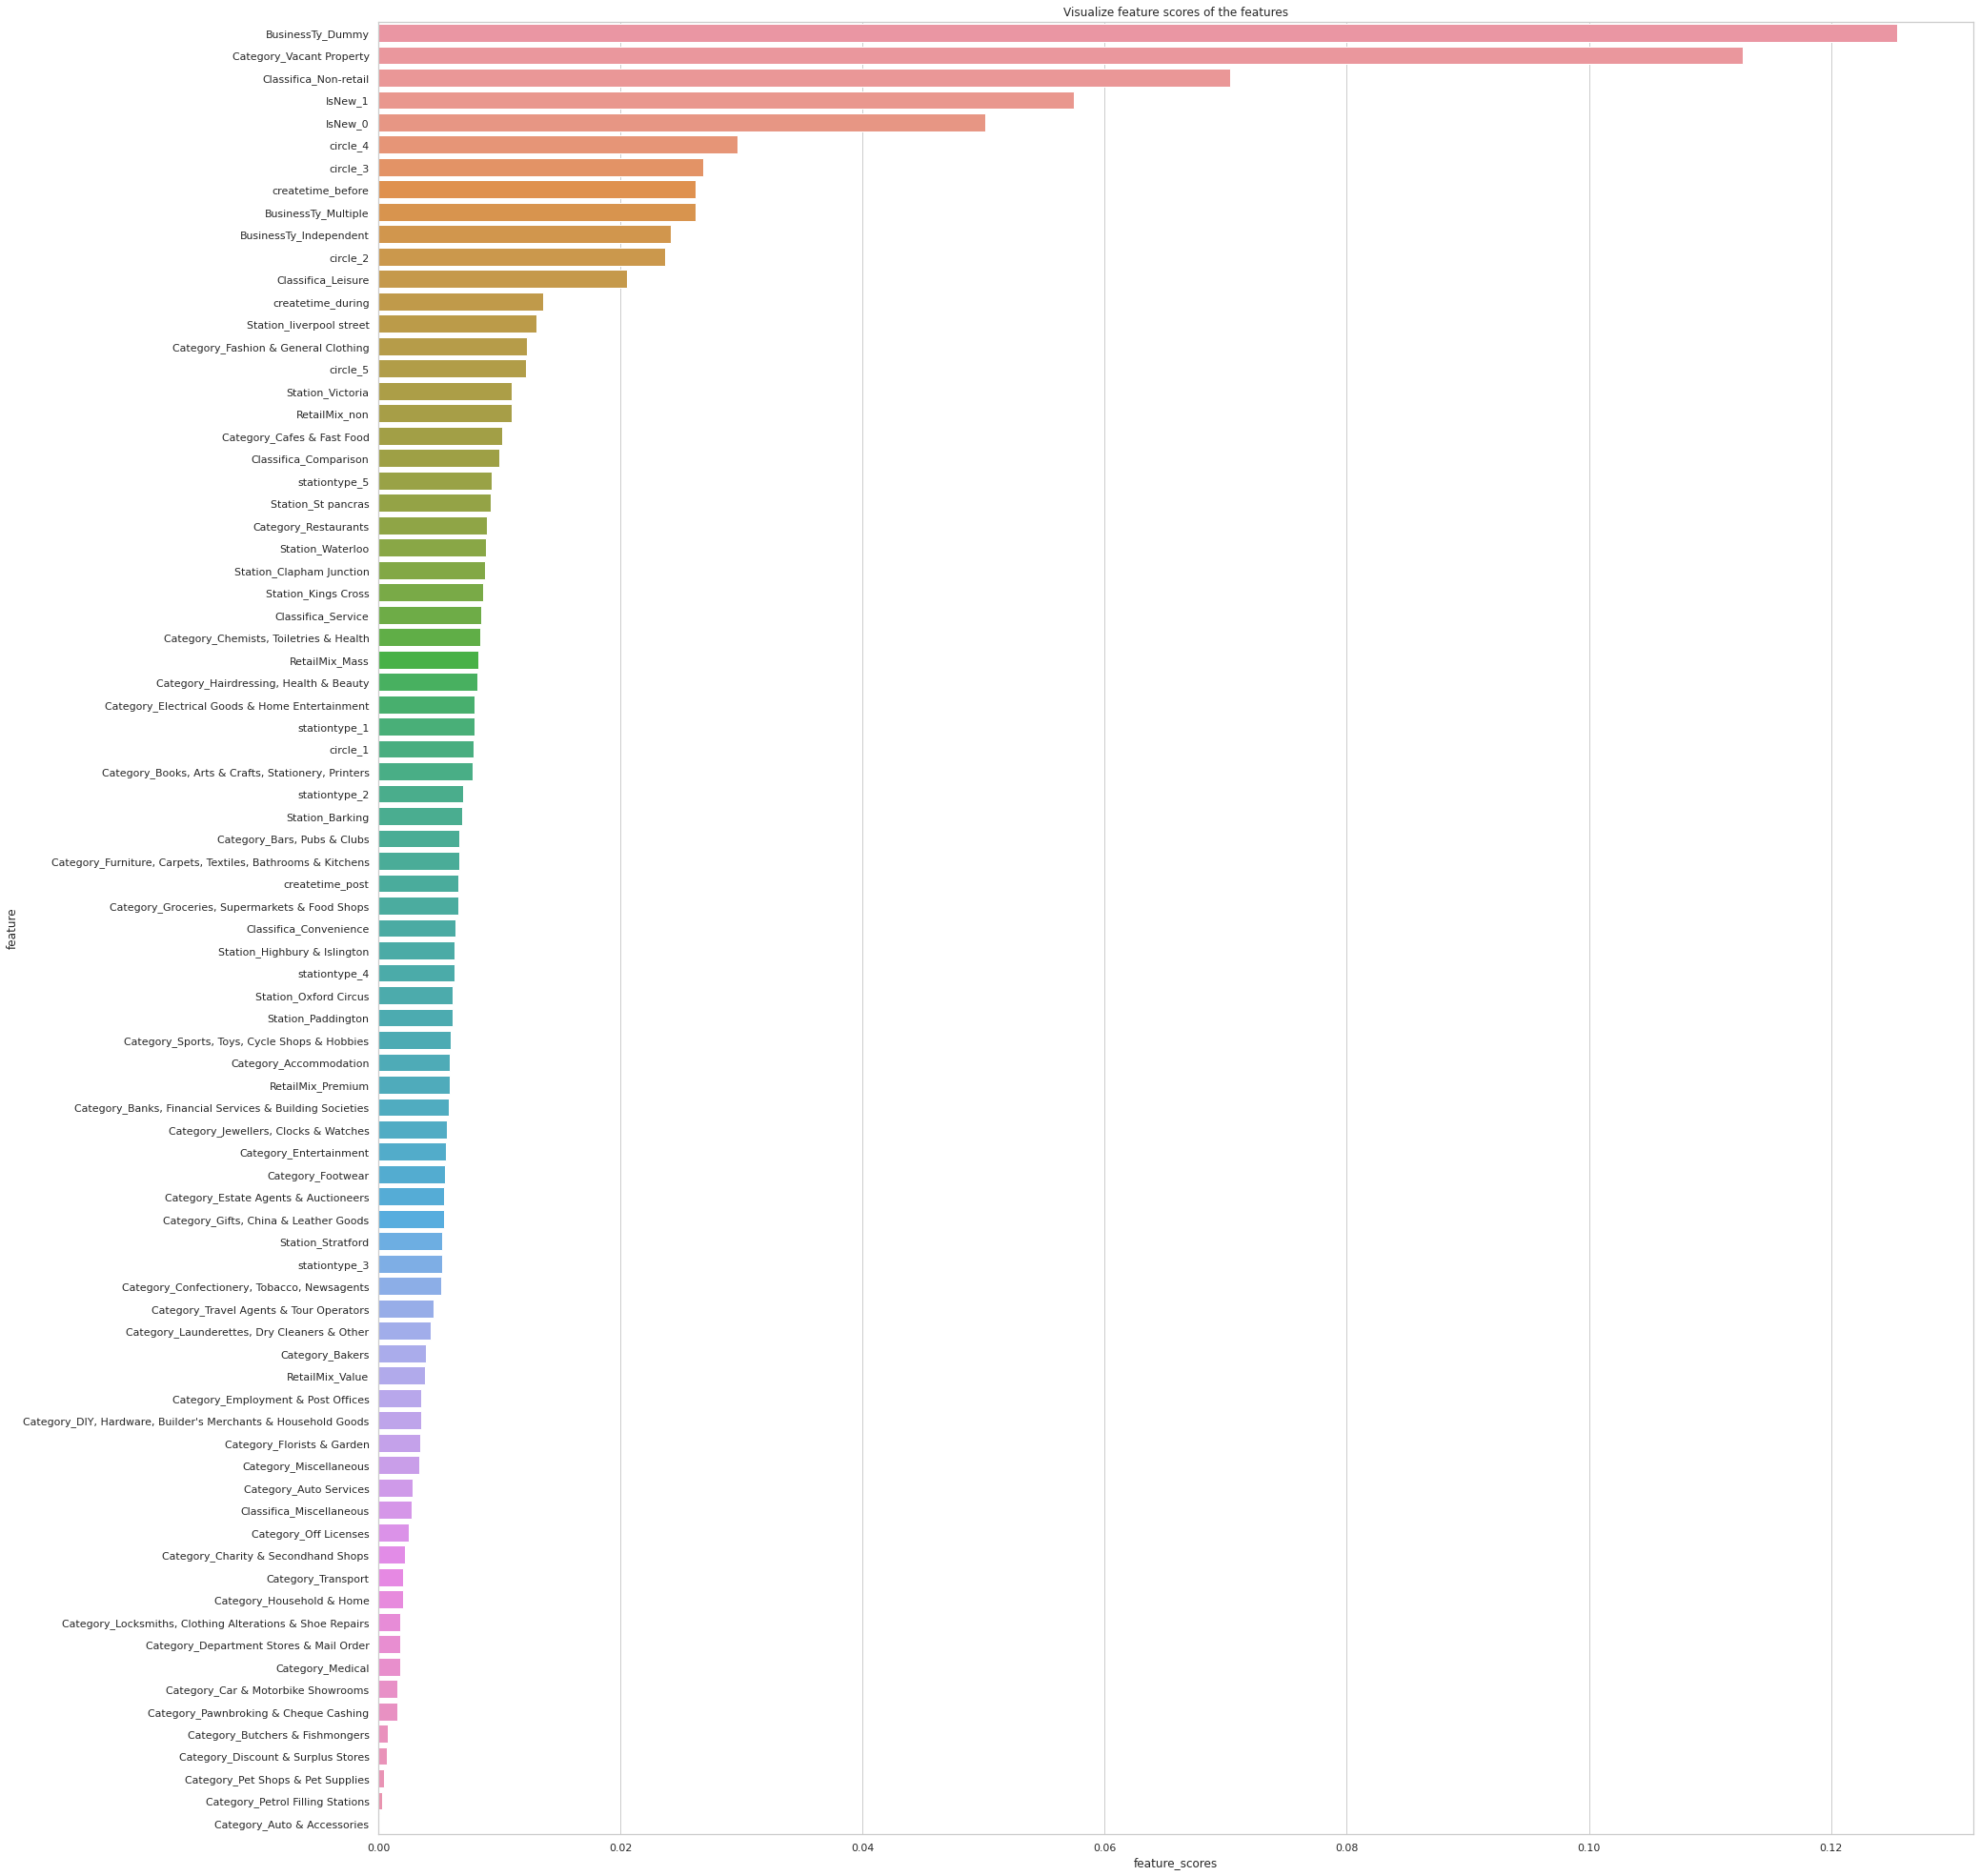

In [625]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 35))
ax = sns.barplot(x="feature_scores", y="feature", data=feature_scores)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels("feature_scores")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### 3.12 Build the Random Forest model on selected features

In [629]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[   5   10   11    2  166    0]
 [   9   38   41    0  406    0]
 [   6   24   59    1  497    0]
 [   0    6    6    4   92    0]
 [  16   86  111    7 2276    0]
 [   0    0    3    0    0  545]]


In [630]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ValueError: Shape of passed values is (6, 6), indices imply (2, 2)

In [628]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with Category_Auto & Accessories variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Category_Auto & Accessories variable removed : 0.6612


#### next step

<br>① calculate feature importance by stations and station types separately；</br>
<br>② remove those variables have multicollinearity;</br>
<br>③ closed time should be limited to DURING and POST, and their feature importances should be viewed separately.</br>